# CS245 Big Data Analytics - Assignment 1
## Deadline: 11:59PM (midnight), October 28, 2024

## Instructions
Each assignment is structured as a Jupyter notebook, offering interactive tutorials that align with our lectures. You will encounter two types of problems: *write-up problems* and *coding problems*.

1. **Write-up Problems:** These problems are primarily theoretical, requiring you to demonstrate your understanding of lecture concepts and to provide mathematical proofs for key theorems. Your answers should include sufficient steps for the mathematical derivations.
2. **Coding Problems:** Here, you will be engaging with practical coding tasks. These may involve completing code segments provided in the notebooks or developing models from scratch.

To ensure clarity and consistency in your submissions, please adhere to the following guidelines:

* For write-up problems, use Markdown bullet points to format text answers. Also, express all mathematical equations using $\LaTeX$ and avoid plain text such as `x0`, `x^1`, or `R x Q` for equations.
* For coding problems, comment on your code thoroughly for readability and ensure your code is executable. Non-runnable code may lead to a loss of **all** points. Coding problems have automated grading, and altering the grading code will result in a deduction of **all** points.
* Your submission should show the entire process of data loading, preprocessing, model implementation, training, and result analysis. This can be achieved through a mix of explanatory text cells, inline comments, intermediate result displays, and experimental visualizations.

### Collaboration and Integrity

* Collaboration is encouraged, but all final submissions must be your own work. Please acknowledge any collaboration or external sources used, including websites, papers, GitHub repositories, and large language models.
* Any suspicious cases of academic misconduct will be reported to The Office of the Dean of Students.

## Before You Start

Useful information about managing environments can be found [here](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html).

You may also quickly review the usage of basic Python and Numpy package, if needed in coding for matrix operations.

In this notebook, you must not delete any code cells in this notebook. If you change any code outside the blocks that you are allowed to edit (between `START/END YOUR CODE HERE`), you need to highlight these changes. You may add some additional cells to help explain your results and observations.

## Part 1: KMeans (40 points + 10 bonus points)

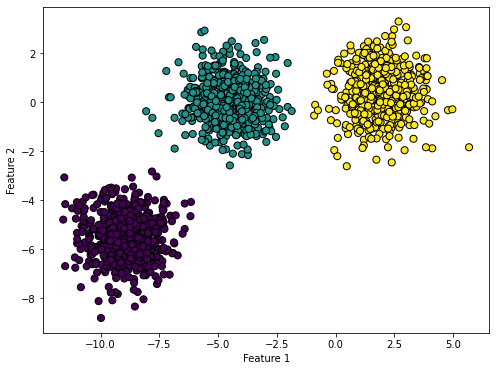

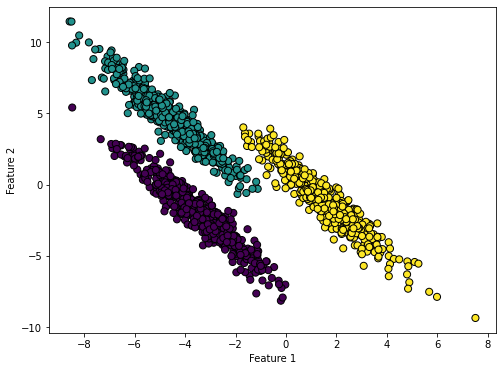

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns

n_samples = 1500
random_state = 170
transformation = [[1, -1], [-1, 2]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

X = np.dot(X, transformation)  # Anisotropic blobs

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Problem 1.1: L2 Mutual Distances (5 points)

In this problem, you will implement functions to calculate the L2 mutual distances between two sets of points.

Instructions:
- Implement the `l2_mutual_distance` function to calculate the L2 mutual distances between points in `X` and `Y`.
- Visualize the similarity matrices using hierarchical clustering with `seaborn.clustermap`.

Hints:
- An example implementation of `l1_mutual_distance` function to calculate the L1 mutual distances has been provided.
- Use `np.expand_dims` to add new dimensions to the arrays for broadcasting.
- Use `np.abs` for L1 distance and `np.square` for L2 distance.
- Use `np.sum` with `axis=-1` to sum along the last dimension.

/Users/emilysu/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


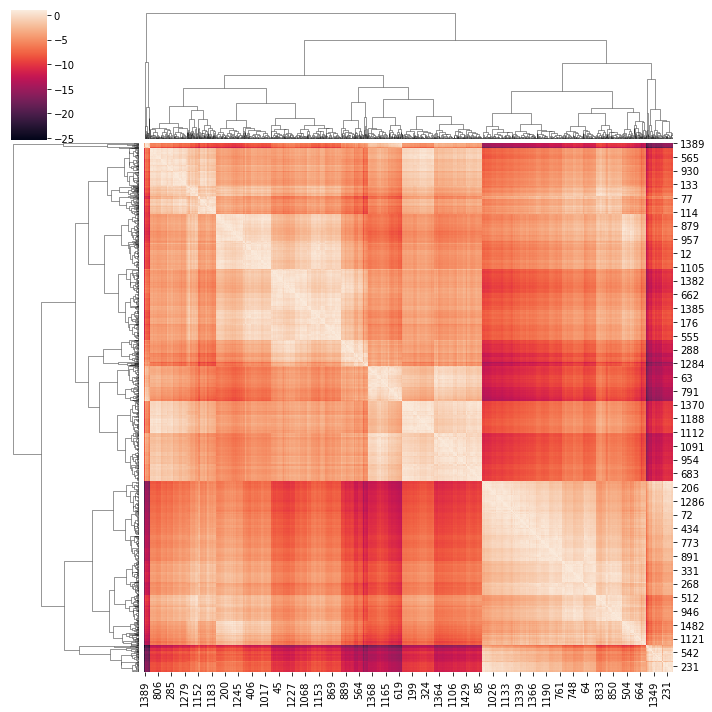

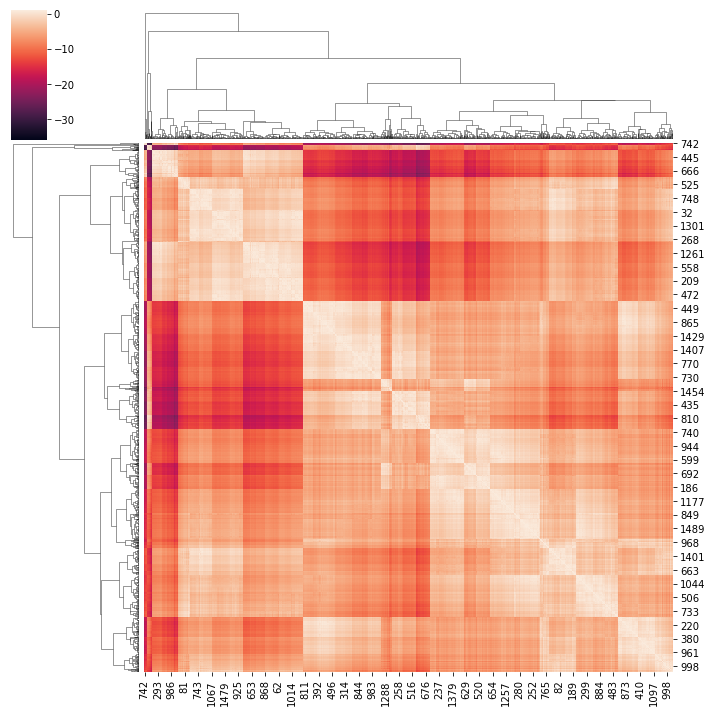

In [35]:
def l1_mutual_distance(X, Y):
    """
        X: ndarray [s, ndim]
        Y: ndarray [t, ndim]
    """
    X_expand = np.expand_dims(X, axis=1) # X_expand: [s, 1, ndim]
    Y_expand = np.expand_dims(Y, axis=0) # Y_expand: [1, t, ndim]
    mutual_square = np.abs(X_expand - Y_expand) # [s, t, ndim]
    return mutual_square.sum(axis=-1) # [s, t]


def l2_mutual_distance(X, Y):
    """
        X: ndarray [s, ndim]
        Y: ndarray [t, ndim]
    """
    # START YOUR CODE HERE
    X_expand = np.expand_dims(X, axis=1) # Expand dims of X to [s, 1, ndim]
    Y_expand = np.expand_dims(Y, axis=0) # Expand dims of Y to [1, t, ndim]
    mutual_square = np.square(X_expand - Y_expand) # Calculate squared L2 distance between X_expand and Y_expand
    return np.sqrt(mutual_square.sum(axis=-1)) # [s, t]
    # END YOUR CODE HERE

# Visualize similarity matrices using hierarchical clustering
sim = 1 - l2_mutual_distance(X, X)
sns.clustermap(sim)
plt.show()

sim = 1 - l1_mutual_distance(X, X)
sns.clustermap(sim)
plt.show()

### Problem 1.2: KMeans Clustering with L2 Distance (10 points)

In this problem, you will implement the KMeans clustering algorithm using L2 distance.

Instructions:
- Complete the `k_means_clustering` function to perform KMeans clustering on the input data `X` with `k` clusters.
- Implement the assignment step to assign each point to the nearest centroid.
- Implement the update step to update the centroids based on the assigned points.
- Repeat the assignment and update steps until convergence or maximum iterations are reached.
- Plot the average distance to cluster centers over iterations.
- Apply the implemented KMeans clustering on the provided dataset and visualize the results.

Hints:
- Use `np.argmin` to find the index of the nearest centroid for each point.
- Use `np.mean` to update the centroids based on the assigned points.
- Use `np.all` to check for convergence.

Stop at iter 9


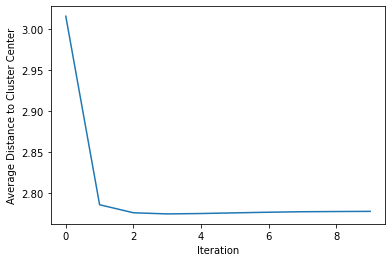

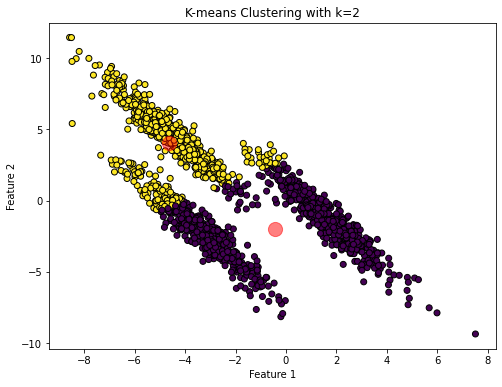

In [36]:
def k_means_clustering(X, k, max_iters=100):
    # Step 1: Initialize centroids randomly from the data points
    indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[indices]
    distance_per_iteration = []

    for iter_idx in range(max_iters):
        # Step 2: Assignment step
        distances = l2_mutual_distance(X, centroids)  # Calculate distances between X and centroids
        # START YOUR CODE HERE
        closest_cluster = np.argmin(distances, axis=1)  # Find the index of the nearest centroid for each point
        closest_distance = np.min(distances, axis=1)  # Get the distance to the nearest centroid for each point
        distance_per_iteration.append(np.mean(closest_distance))  # Append the average distance to the list
        # END YOUR CODE HERE

        # Step 3: Update step
        # START YOUR CODE HERE
        # Update centroids based on the assigned points
        new_centroids = np.zeros((k, X.shape[1])) # Initialize an array to store new centroids 
        for i in range(k):
            points_in_cluster = X[closest_cluster == i] # Select all points that were assigned to cluster i
            if len(points_in_cluster) > 0: # Make sure cluster is not empty
                new_centroids[i] = points_in_cluster.mean(axis=0) # Calculate mean of points in cluster i
        # END YOUR CODE HERE

        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            print('Stop at iter %d' % iter_idx)
            break

        centroids = new_centroids

    # Print final average distance, so we can run with different k's in Problem 1.3 
    # final_avg_distance = np.mean(closest_distance)
    # print(f"Final average distance for k={k}:{final_avg_distance:.4f}")
    
    plt.plot(distance_per_iteration)
    plt.xlabel('Iteration')
    plt.ylabel('Average Distance to Cluster Center')
    plt.show()
    
    return closest_cluster, centroids

# Apply K-means to the two-moons dataset with k=2
k = 2
clusters_kmeans, centroids_kmeans = k_means_clustering(X, k)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters_kmeans, cmap='viridis', edgecolors='k')
plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], c='red', s=200, alpha=0.5)
plt.title("K-means Clustering with k=%d" % k)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Problem 1.3: Parameter Studies (15 points)

For each of the above questions, provide your code and a brief explanation.

1. Try running K-Means with different values of `n_clusters`. How does the final "average distance" change with different `n_clusters`? Why? What if we set `n_clusters = n_points`, what is the lowest average distance in that case?

2. Use `from sklearn.metrics import silhouette_samples, silhouette_score` to determine the optimal `n_clusters` for this problem. You can refer to the [scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py) for guidance.

3. Try running KMeans with different initialization (random seeds) and record the centroids over 10 rounds. Plot these centroids using `plt.scatter`. Are they the same? Why?

1. As `n_clusters`  increases, the final "average distance" decreases, as points are more likely to be closer to their assigned centroids. As you can see from the code below, I tested different values of `n_clusters` and printed out their final average distance. If `n_clusters = n_points`, the lowest average distance becomes 0 because each point is its own cluster, as evidenced by the plots below.


Running K-means with k=2
Stop at iter 12


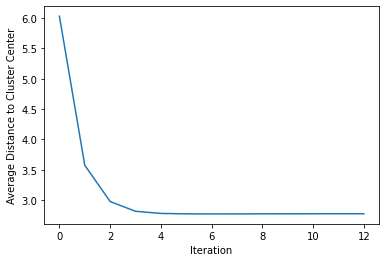

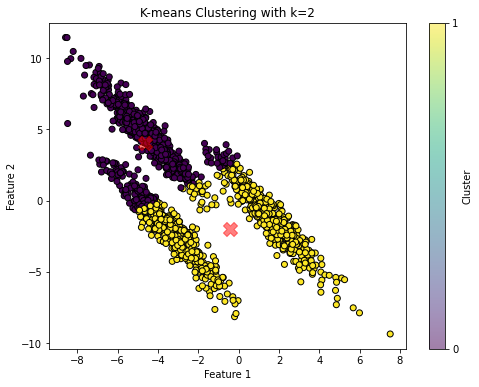


Running K-means with k=3
Stop at iter 14


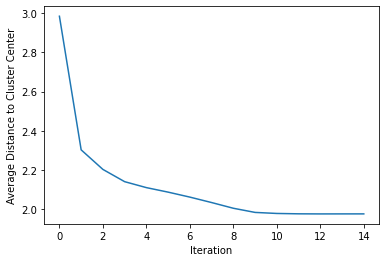

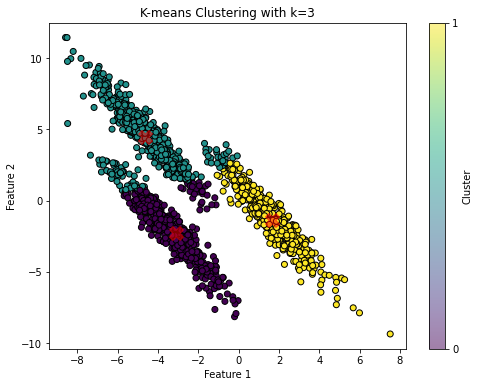


Running K-means with k=5
Stop at iter 13


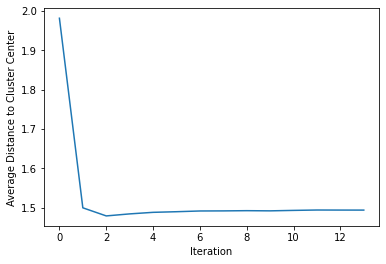

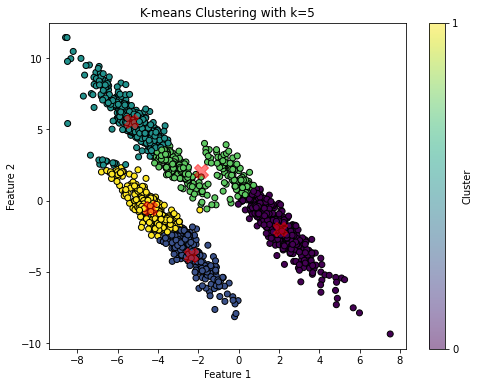


Running K-means with k=10
Stop at iter 45


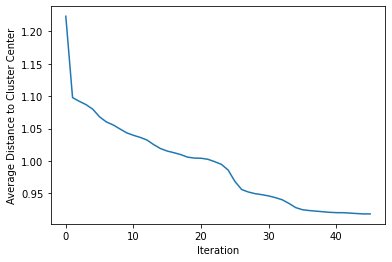

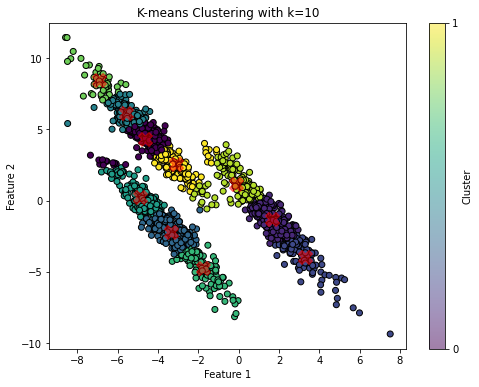


Running K-means with k=20
Stop at iter 22


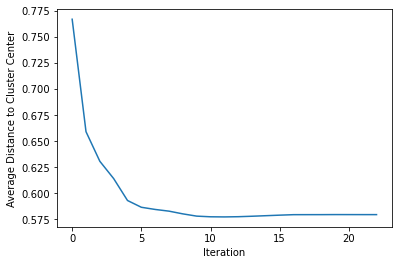

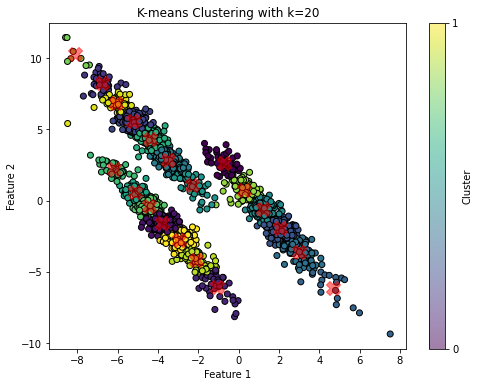


Running K-means with k=n_points (1500)
Stop at iter 0


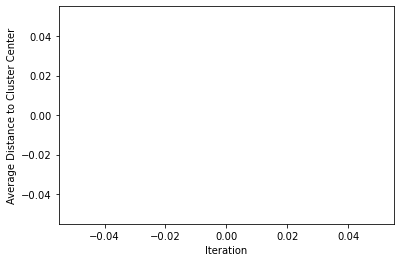

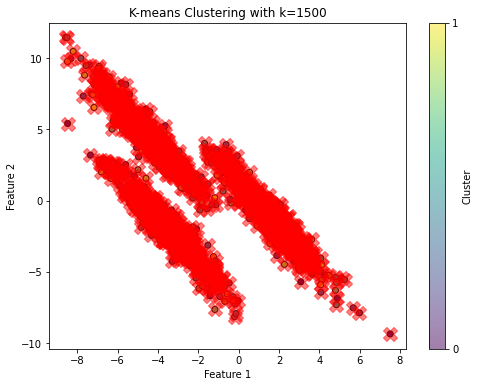

In [37]:
# Code for 1

# Try different values of k
n_clusters = [2, 3, 5, 10, 20]

for k in n_clusters:
    print(f"\nRunning K-means with k={k}")
    clusters, centroids = k_means_clustering(X, k)
    
    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', edgecolors='k')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5, marker='X')
    plt.title(f"K-means Clustering with k={k}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(ticks=range(k), label='Cluster')
    plt.show()

# For n_clusters = n_points
n_points = X.shape[0]
print(f"\nRunning K-means with k=n_points ({n_points})")
clusters, centroids = k_means_clustering(X, n_points)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5, marker='X')
plt.title(f"K-means Clustering with k={n_points}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(ticks=range(k), label='Cluster')
plt.show()

2. When n_clusters is equal to 3, we can see that the silhouette score is the highest at 0.5194. A high silhouette score means that each object is well-matched to its cluster and poorly-matched to other clusters. Therefore, having `n_clusters = 3` is optimal.

Stop at iter 14


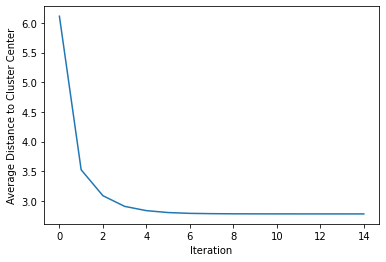

For n_clusters = 2, the average silhouette score is : 0.4943
Stop at iter 14


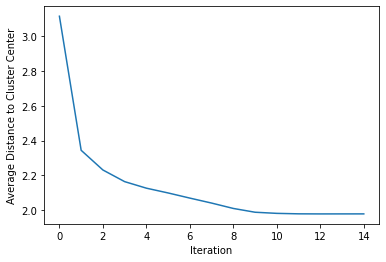

For n_clusters = 3, the average silhouette score is : 0.5194
Stop at iter 14


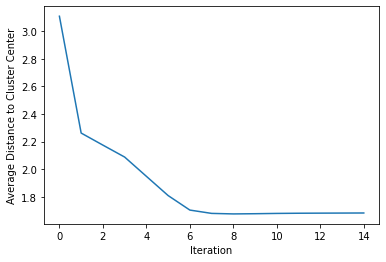

For n_clusters = 4, the average silhouette score is : 0.4765
Stop at iter 11


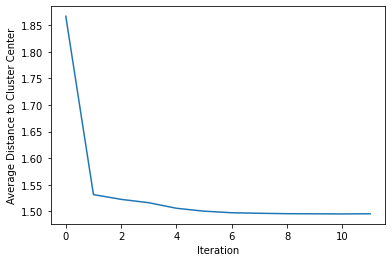

For n_clusters = 5, the average silhouette score is : 0.4870
Stop at iter 23


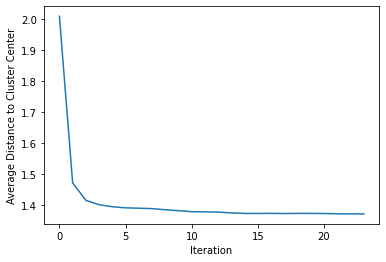

For n_clusters = 6, the average silhouette score is : 0.4602
Stop at iter 12


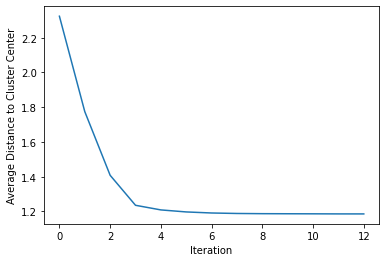

For n_clusters = 7, the average silhouette score is : 0.4633
Stop at iter 28


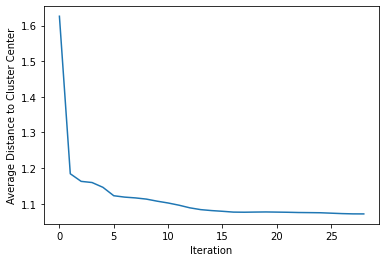

For n_clusters = 8, the average silhouette score is : 0.4528
Stop at iter 33


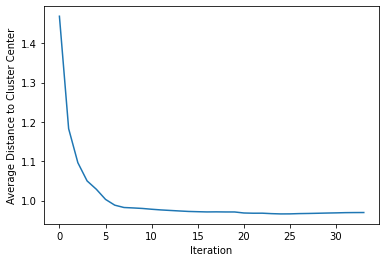

For n_clusters = 9, the average silhouette score is : 0.4589
Stop at iter 21


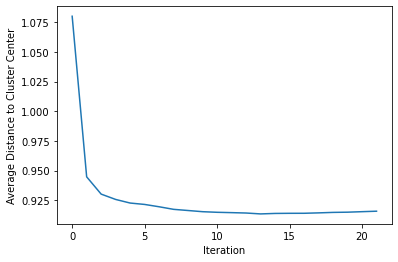

For n_clusters = 10, the average silhouette score is : 0.4512


NameError: name 'k_values' is not defined

In [38]:
# Code for 2
from sklearn.metrics import silhouette_score

# Perform silhouette analysis
max_k = 10
silhouette_scores = []
n_clusters = range(2, max_k + 1)  # Start from 2 clusters

for k in n_clusters:
    clusters_kmeans, _ = k_means_clustering(X, k)
    score = silhouette_score(X, clusters_kmeans)
    silhouette_scores.append(score)
    print(f"For n_clusters = {k}, the average silhouette score is : {score:.4f}")

# Find optimal k
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"\nThe optimal number of clusters based on silhouette analysis is: {optimal_k}")

# Run K-means with the optimal k
clusters_kmeans, centroids_kmeans = k_means_clustering(X, optimal_k)

# Plot the results with optimal k
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters_kmeans, cmap='viridis', edgecolors='k')
plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], c='red', s=200, alpha=0.5, marker='X')
plt.title(f"K-means Clustering with Optimal k={optimal_k}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(scatter, label='Cluster')
plt.show()

3. Yes, after running k=3 for 10 different initializations (random seeds), I found that the centroids are the same for all initializations. This is most likely because the K-means algorithm converges to the same minimum each time and due to the fact that the dataset has well-separated clusters.

Stop at iter 16


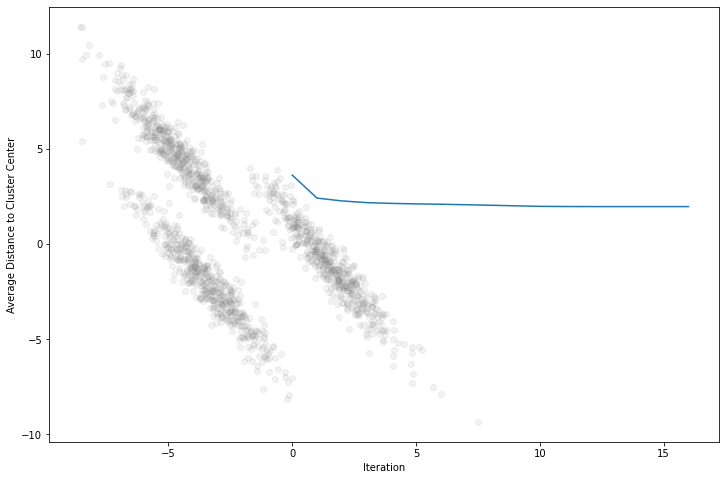

Stop at iter 28


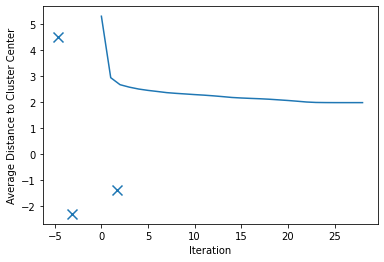

Stop at iter 6


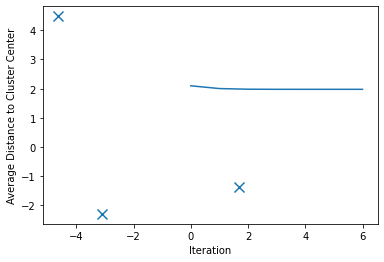

Stop at iter 26


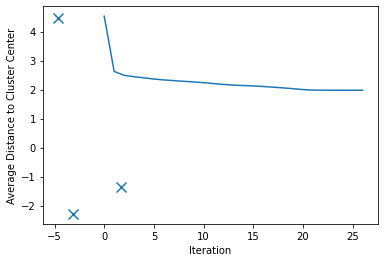

Stop at iter 26


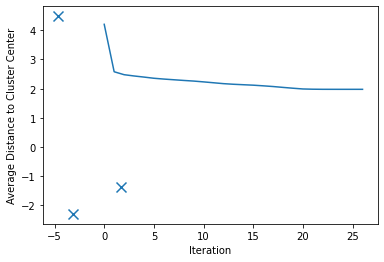

Stop at iter 22


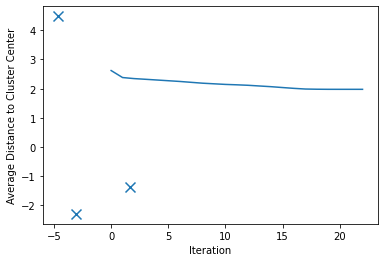

Stop at iter 7


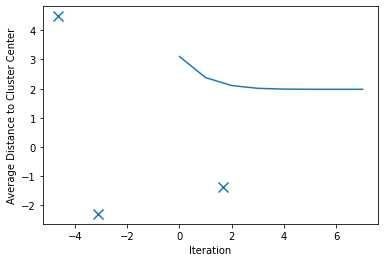

Stop at iter 25


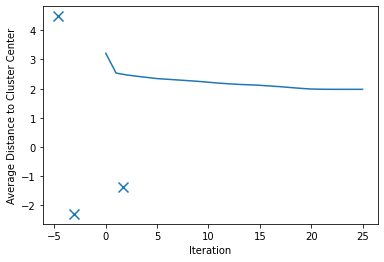

Stop at iter 24


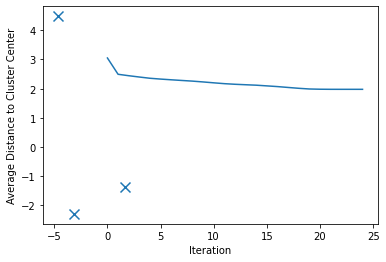

Stop at iter 5


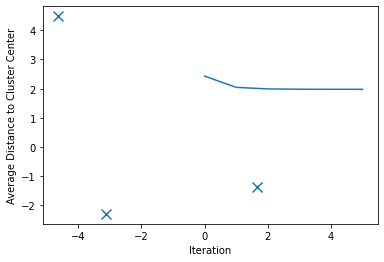

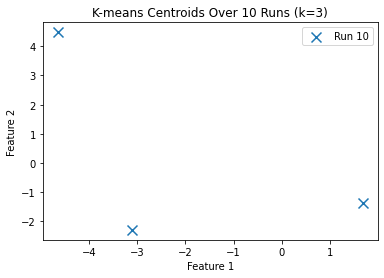


Centroids for Run 1:
[[-3.11026196 -2.28972525]
 [-4.63524868  4.48052717]
 [ 1.66774364 -1.37222444]]

Centroids for Run 2:
[[-4.63524868  4.48052717]
 [ 1.66774364 -1.37222444]
 [-3.11026196 -2.28972525]]

Centroids for Run 3:
[[-4.63524868  4.48052717]
 [ 1.66774364 -1.37222444]
 [-3.11026196 -2.28972525]]

Centroids for Run 4:
[[-3.11026196 -2.28972525]
 [ 1.66774364 -1.37222444]
 [-4.63524868  4.48052717]]

Centroids for Run 5:
[[ 1.66774364 -1.37222444]
 [-4.63524868  4.48052717]
 [-3.11026196 -2.28972525]]

Centroids for Run 6:
[[-4.63524868  4.48052717]
 [-3.11026196 -2.28972525]
 [ 1.66774364 -1.37222444]]

Centroids for Run 7:
[[-3.11026196 -2.28972525]
 [-4.63524868  4.48052717]
 [ 1.66774364 -1.37222444]]

Centroids for Run 8:
[[ 1.66774364 -1.37222444]
 [-4.63524868  4.48052717]
 [-3.11026196 -2.28972525]]

Centroids for Run 9:
[[ 1.66774364 -1.37222444]
 [-4.63524868  4.48052717]
 [-3.11026196 -2.28972525]]

Centroids for Run 10:
[[-4.63524868  4.48052717]
 [ 1.66774364 

In [39]:
# Code for 3

k = 3
n_runs = 10
all_centroids = []

plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.1, label='Data Points')

for i in range(n_runs):
    np.random.seed(i) # Set a different random seed for each run
    
    # Run k-means
    _, centroids = k_means_clustering(X, k)
    all_centroids.append(centroids)
    
    # Plot the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, label=f'Run {i+1}')

plt.title(f"K-means Centroids Over {n_runs} Runs (k={k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Print out the centroids for each run
for i, centroids in enumerate(all_centroids):
    print(f"\nCentroids for Run {i+1}:")
    print(centroids)

### Problem 1.4: Convergence (10 points)

Prove that the K-Means clustering algorithm converges in a finite number of steps.


1. **Objective Function**  
   **Sub-question**: What is the objective function that K-Means minimizes? How does this function change after each iteration?  
   **Hint**: Consider the within-cluster sum of squares (WCSS):
   $$
   J = \sum_{i=1}^k \sum_{x \in C_i} \|x - \mu_i\|^2
   $$
   Explore how this function behaves during each step of the algorithm. How do the assignment and update steps influence the value of $J$?

2. **Bounding the Objective**  
   **Sub-question**: What is the smallest possible value the objective function $J$ can take? What does this imply about the number of iterations?  
   **Hint**: Think about the range of possible values for $J$. How does the fact that the objective is non-negative affect the number of iterations?

3. **Monotonic Decrease in Steps**  
   **Sub-question**: Why does the objective function either decrease or remain constant after each iteration?  
   **Hint**: Analyze both the assignment and centroid update steps. How does each step attempt to minimize the distance between points and centroids?

4. **Finite Configurations**  
   **Sub-question**: Why can the algorithm only run for a finite number of steps?  
   **Hint**: Consider the number of possible assignments of $n$ points to $k$ clusters. Why does the algorithm eventually stabilize after some iterations?


1. The objective function that K-means minimizes is the within-cluster sum of squares (WCSS), represented by the equation below.
$$
J = \sum_{i=1}^k \sum_{x \in C_i} \|x - \mu_i\|^2
$$
After each iteration, this function changes based on the assignment and update steps. In the assignment step, points are assigned to the nearest centroids, typicially reducing J and in the update step, centroids are recalculated as the mean of the assigned points, further minimizing J.

2. The smallest possible value that J can take is 0, which occurs when each data point is assigned to its own cluster or when the number of data points is equal to the amount of desired clusters. We explored this in question 1 of problem 1.3 above. This indicates the algorithm cannot continue indefinitely, as it will stabilize once the configuration of assignments does not change. Since J is non-negative, it provides a bound that implies convergence occurs within a finite number of iterations.

3. In the assignment step, each point is assigned to the closest centroid, minimizing the distance to the centroid, thus lowering J and in the update step, the centroids are updated to the means of the assigned points, which minimizes the distances of those points to the centroids. As a result, J either decreases or stays the same after each iteration.
$$
J^{(t+1)} \leq J^{(t)}
$$

4. The algorithm can only run for a finite number of steps because the number of possible assignments of n points to k clusters is limited. Each configuration represents a unique way to assign points to clusters, and since there are finite points and clusters, the possible assignments must be finite as well. Therefore, as the algorithm iterates, it will eventually stabilize when the assignments no longer change, leading to convergence in a limited number of iterations.



### Problem 1.5: Convergence with $L_1$ Distance (10 bonus points)

Prove that K-Means still converges in a finite number of steps when using the $L_1$ (Manhattan) distance instead of the $L_2$ (Euclidean) distance.

**Hint**: Reformulate the objective function using the $L_1$ distance:
$$
J_{L1} = \sum_{i=1}^k \sum_{x \in C_i} \|x - \mu_i\|_1
$$
Investigate whether the properties that guarantee convergence under the $L_2$ norm (monotonic decrease, boundedness, and finite configurations) still hold under the $L_1$ norm. Can the same reasoning apply for this different distance metric?

1. Monotonic Decrease: In each iteration, the assignment step reduces the sum of $L_1$ distances by assigning each point to the nearest centroid, while the update step minimizes these distances by setting centroids to the median of assigned points. This ensures that the objective function $J_{L1}$ either decreases or remains constant.
2. Boundedness: The objective function $J_{L1}$, representing the sum of absolute distances, is always non-negative and has a lower bound of zero. Since it decreases or stays constant with each iteration, it must eventually reach a point where no further reduction is possible.
3. Finite Configurations: With a finite number of ways to assign $n$ points to $k$ clusters, the algorithm cannot revisit the same state without stabilizing. Therefore, after a finite number of steps, the assignments and centroids converge.

Therefore, the reasoning for convergence under the $L_2$ norm also applies to the $L_1$ norm because three three properties of monotonic decrease, boundedness, and finite configurations still hold.

## Part 2: Decision Trees (50 points)

### Problem 2.1 (20 points)

The goal of this question is to help you become more familiar with the basic equalities and inequalities of information theory. They appear in many contexts in machine learning and elsewhere, so having some experience with them is quite helpful. We review some concepts from information theory, and ask you a few questions.

Recall the definition of the entropy of a discrete random variable $X$ with probability mass function $p: H(X)=\sum_x p(x) \log _2\left(\frac{1}{p(x)}\right)$. Here the summation is over all possible values of $x \in \mathcal{X}$, which (for simplicity) we assume is finite. For example, $\mathcal{X}$ might be $\{1,2, \ldots, N\}$. You may assume $p(x) \log _2\left(\frac{1}{p(x)}\right)=0$ if $p(x)=0$.

1. (5 points) Prove that the entropy $H(X)$ is non-negative.

2. (5 points) Prove the relationship between cross-entropy loss and KL divergence.

    KL-divergence (or called relative entropy) of two distributions $p$ and $q$ is defined as
    $$
    \mathrm{KL}(p \| q)=\sum_x p(x) \log _2 \frac{p(x)}{q(x)} .
    $$

    The KL-divergence is one of the most commonly used measure of difference (or divergence) between two distributions, and it regularly appears in information theory, machine learning, and statistics. For this question, you may assume $p(x)>0$ and $q(x)>0$ for all $x$.
    If two distributions are close to each other, their KL divergence is small. If they are exactly the same, their KL divergence is zero. KL divergence is not a true distance metric (since it isn't symmetric and doesn't satisfy the triangle inequality), but we often use it as a measure of dissimilarity between two probability distributions.
    
    The cross-entropy between two probability distributions $p$ and $q$ is defined as
    $$
    H(p, q) = -\sum_x p(x) \log_2 q(x).
    $$
    Prove that the cross-entropy can be expressed as the sum of the entropy of $p$ and the KL divergence between $p$ and $q$, i.e.,
    $$
    H(p, q) = H(p) + \mathrm{KL}(p \| q).
    $$


3. (5 points) Prove that $\mathrm{KL}(p \| q)$ is non-negative. <mark> Hint: You might want to use Jensen's inequality.</mark>

4. (5 points) The Information Gain or Mutual Information between $X$ and $Y$ is $I(Y ; X)=$ $H(Y)-H(Y \mid X)$. Show that
    $$
    I(Y ; X)=\mathrm{KL}(p(x, y) \| p(x) p(y)),
    $$
    where $p(x)=\sum_y p(x, y)$ is the marginal distribution of $X$.


Answers:
1. Using the log properties, we know that $\log_2(\frac{1}{p(x)}) = -\log_2 p(x)$, so we can rewrite the formula for entropy as 
$$ 
H(X)=\sum_x p(x) (-\log _2{p(x)})
$$ Additionally, because we know that ${p(x)}$ is between 0 and 1, we can deduce:
$$
0 <= {p(x)} <=1
$$
$$
-\infty <= log_2{p(x)} <= 0
$$
$$
0 <= -log_2{p(x)} <= +\infty
$$
$$
0 <= p(x)(-log_2{p(x)}) <= +\infty
$$
This tells us that each addend in our $H(X)$ formula is either positive or zero, so the sum must be equal to or greater than zero and therefore, non-negative.


2. Once again, using log properties, we know that $\log_2 \frac{p(x)}{q(x)} = \log_2{p(x)} - \log_2{q(x)}$. We can rewrite the KL divergence formula as $\mathrm{KL}(p \| q)=\sum_xp(x)(\log_2{p(x)} - \log_2{q(x)})$ and then simplify it to 
$$
\mathrm{KL}(p \| q)=\sum_xp(x)(\log_2{p(x)}) - \sum_xp(x)(\log_2{q(x)})
$$
We know that cross-entry is defined as
$$
H(p, q) = -\sum_x p(x) \log_2 q(x).
$$
From the previous proof, we know that the entropy formula can be rewritten to $H(p)=\sum_x p(x) (-\log _2{p(x)})$, which can be simplified to
$$
H(p)=-\sum_x p(x) (\log _2{p(x)})
$$
Add the formulas for entropy of p and the KL divergence between p and q.
$$
H(p) + \mathrm{KL}(p \| q) = -\sum_x p(x) (\log _2{p(x)}) + \sum_xp(x)(\log_2{p(x)}) - \sum_xp(x)(\log_2{q(x)}) = -\sum_x p(x) \log_2 q(x)
$$
The resulting sum is equal to our formula for cross-entropy. Therefore, we can write that
$$
H(p, q) = H(p) + \mathrm{KL}(p \| q).
$$


3. Jensen's inequality states that for a convex function $\phi(x)$ and a random variable $X$,
$$
\mathbb{E}[\phi(X)] \geq \phi(\mathbb{E}[X])
$$
Since the logarithmic function is concave (the negative of a convex function), we apply Jensen's inequality to the KL divergence. 
The KL divergence can be rewritten as the expected value of the logarithm of the ratio $\frac{p(x)}{q(x)}$:
$$
{\text{KL}}(p \parallel q) = \mathbb{E} \left[ \log \frac{p(x)}{q(x)} \right]
$$
Define $X = \frac{q(x)}{p(x)}$. Since $\log (x)$ is concave, we know that:
$$
\mathbb{E} \left[ \log \frac{q(x)}{p(x)} \right] \leq \log \mathbb{E} \left[ \frac{q(x)}{p(x)} \right]
$$
We can simplify the RHS expression because we know that
$$
\mathbb{E} \left[ \frac{p(x)}{q(x)} \right] = \sum_x p(x) \cdot \frac{q(x)}{p(x)} = \sum_x q(x) = 1
$$
Therefore, 
$$
\log \mathbb{E} \left[ \frac{q(x)}{p(x)} \right] = \log(1) = 0.
$$
Thus, Jensen's inequality leads us to:
$$
\mathbb{E} \left[ \log \frac{p(x)}{q(x)} \right] \geq 0
$$
Because the expected value is non-negative, the KL divergence must be non-negative as well. Thus, we have proven that:
$$
{\text{KL}}(p \parallel q) \geq 0
$$


4. The entropy of Y is:
$$
H(Y)=-\sum_y p(y) (\log _2{p(y)})
$$
The conditional entropy of Y|X is:
$$
 H(Y \mid X) = -\sum_{x, y} p(x, y) \log p(y \mid x)
$$
Using the conditional identity $p(x \mid y) = \frac{p(x, y)}{p(y)}$, we can rewrite it to:
$$
H(Y \mid X) = -\sum_{x, y} p(x, y) \log \frac{p(x, y)}{p(x)}
$$
Using the expression $ I(Y; X) = H(Y) - H(Y \mid X)$, substitute the above definitions for $ H(Y)$ and $ H(Y \mid X)$:
$$
I(Y; X) = -\sum_x p(x) \log p(x) + \sum_{x, y} p(x, y) \log \frac{p(x, y)}{p(x)}
$$
This simplifies to:
$$
I(Y; X) = \sum_{x, y} p(x, y) \log \frac{p(x, y)}{p(y)p(x)}
$$
The expression for mutual information can now be written as KL divergence:
$$
I(Y; X) = {\text{KL}}(p(y, x) \parallel p(y)p(x))
$$
where:
$$
{\text{KL}}(p(y, x) \parallel p(y)p(x)) = \sum_{y, x} p(y, x) \log \frac{p(y, x)}{p(y)p(x)}
$$
Thus, we have shown that the mutual information between $ Y$ and $X$ is equivalent to the KL divergence between their joint distribution and the product of their marginal distributions:
$$
I(Y; X) = {\text{KL}}(p(y, x) \parallel p(y)p(x))
$$

### Problem 2.2 (10 points)
Implement the `gini` function. The `gini` function should return the Gini impurity of a classification problem. It should take a list of class labels as input and return a float.

In [20]:
%pip install graphviz

     |████████████████████████████████| 47 kB 2.1 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [40]:
import numpy as np
import graphviz
from typing import Optional, List, Any, Tuple
from matplotlib import pyplot as plt

In [41]:
def entropy(y: List[int]) -> float:
    """
    Calculate the entropy of a list of class labels.

    Parameters:
    y (List[int]): List of class labels.

    Returns:
    float: Entropy.
    """
    # Calculate the proportions of each class label in the target variable y
    counts = np.bincount(y)
    probabilities = counts / counts.sum()
    # Calculate the entropy using the proportions
    probabilities = probabilities.clip(1e-10, 1-1e-10)
    # The entropy is the negative sum of p * log2(p) for each non-zero proportion p
    ent = -np.sum(probabilities * np.log2(probabilities))
    return ent

def gini(y: List[int]) -> float:
    """
    Calculate the Gini impurity of a list of class labels.

    Parameters:
    y (List[int]): List of class labels.

    Returns:
    float: Gini impurity.
    """
    # START YOUR CODE HERE
    # Calculate the Gini impurity as 1 - sum(p^2) for each proportion p
    # Hint: You can use np.bincount(y) to calculate the proportions of each class label in the target variable y
    counts = np.bincount(y)
    probabilities = counts / counts.sum() # Calculate the proportions of each class
    gini_impurity = 1 - np.sum(probabilities**2)
    # END YOUR CODE HERE
    return gini_impurity


In [42]:
# Test cases
y = [0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2]
assert np.isclose(gini(y), 0.6446, atol=1e-4), "Gini impurity test case failed."
assert np.isclose(entropy(y), 1.5395, atol=1e-4), "Entropy test case failed."

### Problem 2.3 (10 points)

Implement the `_calculate_gain` function in the `MyDecisionTreeClassifier` class.

- Calculate the specified gain (information gain or Gini gain) for a given split.
- Use the `entropy` or `gini` function to calculate the impurity of the parent and child nodes.
- Return the gain, which is the reduction in impurity.
Hint: Be careful with division by zero when calculating the weighted average of child impurities.

### Problem 2.4 (10 points)

Implement the `_build_tree` function in the `MyDecisionTreeClassifier` class.

- Complete the `_build_tree` function to build the decision tree recursively.
- Use the `_best_split` function to find the best split for each node.
- Create left and right subtrees by calling _build_tree recursively.

Hint: You can use the `_split` function to split the data based on the best split.

In [43]:
class Node:
    def __init__(self, feature: Optional[int] = None, threshold: Optional[float] = None,
                 left: 'Optional[Node]' = None, right: 'Optional[Node]' = None, *,
                 value: Optional[Any] = None, feature_name: Optional[str] = None):
        """
        Initialize a decision tree node.

        Parameters:
            feature (Optional[int]): The index of the feature used for splitting.
            threshold (Optional[float]): The threshold value at which the split is made.
            left (Optional[Node]): The left child node.
            right (Optional[Node]): The right child node.
            value (Optional[Any]): The class label if the node is a leaf.
            feature_name (Optional[str]): The name of the feature used for splitting.

        Returns:
            None
        """
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        self.feature_name = feature_name

In [44]:
class MyDecisionTreeClassifier:
    def __init__(self, gain_name: str, feature_names: List[str], max_depth: Optional[int] = None):
        """
        Constructor for the MyDecisionTreeClassifier.

        Parameters:
            gain_name (str): The name of the gain method used ('entropy' or 'gini').
            feature_names (List[str]): List of feature names corresponding to the features in the dataset.
            max_depth (Optional[int]): The maximum depth of the tree.
        """
        self.root: Optional[Node] = None
        self.feature_importances_: Optional[np.ndarray] = None
        self.feature_names = feature_names
        self.gain_name = gain_name
        self.max_depth: Optional[int] = max_depth

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
            Fit the decision tree classifier to the data.

            Parameters:
            X (np.ndarray): Feature dataset.
            y (np.ndarray): Target values.

        Returns:
        """
        self.n_features_ = X.shape[1]
        self.feature_importances_ = np.zeros(self.n_features_)
        self.root = self._build_tree(X, y, 0)
        total_gain = np.sum(self.feature_importances_)
        if total_gain > 0:
            self.feature_importances_ /= total_gain

            
    # Problem 2.3: Implement the _calculate_gain function
    # - Calculate the specified gain (information gain or Gini gain) for a given split.
    # - Use the entropy or gini function to calculate the impurity of the parent and child nodes.
    # - Return the gain, which is the reduction in impurity.
    # Hint: Be careful with division by zero when calculating the weighted average of child impurities

    def _calculate_gain(self, y: np.ndarray, feature_column: np.ndarray, split_thresh: float) -> float:
        """
        Calculate the gain for a particular split.

        Parameters:
            y (np.ndarray): Target values.
            feature_column (np.ndarray): Feature column by which the split is to be made.
            split_thresh (float): The threshold value for the split.

        Returns:
            float: The calculated gain from making the split.
        """
        gain_func = entropy if self.gain_name == 'entropy' else gini
        # Calculate the impurity of the parent node
        parent_impurity = gain_func(y)
        
        # Create indices for left and right splits
        left_idxs = feature_column <= split_thresh
        right_idxs = feature_column > split_thresh
        
        # Calculate the impurity for each child node
        left_impurity = gain_func(y[left_idxs])
        right_impurity = gain_func(y[right_idxs])
        
        # START YOUR CODE HERE
        # Calculate the weighted average of the child impurities
        left_size = np.sum(left_idxs)
        right_size = np.sum(right_idxs)
        total_size = len(y)
        
        if total_size == 0: # Avoids division by zero
            return 0.0
        child_impurity = (left_size / total_size) * left_impurity + (right_size / total_size) * right_impurity
        # END YOUR CODE HERE
        
        # Calculate the gain as the reduction in impurity
        reduction = parent_impurity - child_impurity
        return reduction

    def _best_split(self, X: np.ndarray, y: np.ndarray, num_features: int) -> Tuple[Optional[int], Optional[float], float]:
        """
        Determine the best split for a given dataset.

        Parameters:
            X (np.ndarray): The dataset.
            y (np.ndarray): The target values.
            num_features (int): Number of features in the dataset.

        Returns:
            Tuple[Optional[int], Optional[float], float]: The index of the best feature to split on, the threshold value for the split, and the gain achieved by this split.
        """
        best_gain = -1
        split_idx, split_thresh = None, None
        for feature_idx in range(num_features):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                gain = self._calculate_gain(y, X[:, feature_idx], threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_idx
                    split_thresh = threshold
        return split_idx, split_thresh, best_gain

    # Problem 2.4: Implement the _build_tree function
    # - Complete the _build_tree function to build the decision tree recursively.
    # - Use the _best_split function to find the best split for each node.
    # - Create left and right subtrees by calling _build_tree recursively.
    # Hint: You can use the _split function to split the data based on the best split.
    def _build_tree(self, X: np.ndarray, y: np.ndarray, depth: int = 0) -> Node:
        """
        Recursively build the decision tree.

        Parameters:
            X (np.ndarray): The dataset.
            y (np.ndarray): The target values.
            depth (int): Current depth of the tree.

        Returns:
            Node: The node that represents the current subtree.
        """
        num_samples, num_features = X.shape
        
        # Base case: If there are no samples or maximum depth is reached, return a leaf node with the most common label
        if num_samples == 0 or depth == self.max_depth:
            most_common_label = np.bincount(y).argmax() if len(y) > 0 else None
            return Node(value=most_common_label)

        # Find the best split for the current node using the _best_split function
        best_feature, best_thresh, best_gain = self._best_split(X, y, num_features)
        
        # If no best split is found, return a leaf node with the most common label
        if best_feature is None:
            most_common_label = np.bincount(y).argmax() if len(y) > 0 else None
            return Node(value=most_common_label)
        
        # Update the feature importances based on the gain of the best split
        self.feature_importances_[best_feature] += best_gain
        
        # START YOUR CODE HERE
        left_idxs = X[:, best_feature] <= best_thresh
        right_idxs = X[:, best_feature] > best_thresh
        X_left, y_left = X[left_idxs], y[left_idxs]
        X_right, y_right = X[right_idxs], y[right_idxs]

        # Build the left and right subtrees recursively
        left = self._build_tree(X_left, y_left, depth + 1)
        right = self._build_tree(X_right, y_right, depth + 1)

        # END YOUR CODE HERE
        
        # Create a new internal node with the best split feature, threshold, and the left and right subtrees
        return Node(best_feature, best_thresh, left, right, feature_name=self.feature_names[best_feature])


    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict the class labels for the provided data.

        Parameters:
            X (np.ndarray): Dataset for which to predict the class labels.

        Returns:
            np.ndarray: Predicted class labels.
        """
        return np.array([self._predict(inputs) for inputs in X])

    def _predict(self, inputs: np.ndarray) -> Any:
        """
        Helper function to predict the class label for a single data point.

        Parameters:
            inputs (np.ndarray): The features of the data point.

        Returns:
            Any: The predicted class label.
        """
        node = self.root
        while node.value is None:
            if node.feature is not None and inputs[node.feature] <= node.threshold:
                node = node.left
            else:
                node = node.right
            if node is None:  # Safeguard against null node
                return 1000  # Or another default value or heuristic
        return node.value

    def visualize(self, node: Optional[Node] = None, depth: int = 0, parent: Optional[Node] = None, edge_label: str = "") -> graphviz.Digraph:
        """
        Visualize the decision tree using Graphviz.

        Parameters:
            node (Optional[Node]): The current node to visualize. If None, start from the root.
            depth (int): The current depth in the tree.
            parent (Optional[Node]): The parent node in the tree.
            edge_label (str): The label for the edge connecting the current node to its parent.

        Returns:
            graphviz.Digraph: The Graphviz object representing the decision tree.
        """
        if node is None:
            node = self.root
            self.graph = graphviz.Digraph(comment='Decision Tree', format='png')

        if node.value is not None:
            node_label = f"Class {node.value}"
        else:
            if node.feature is not None and node.feature < len(self.feature_importances_):
                gain = self.feature_importances_[node.feature]
                if isinstance(gain, np.ndarray) and gain.size == 1:
                    gain = gain.item()  # Convert numpy array to scalar if it's a single-element array
                else:
                    gain = float(gain)  # Ensure it is a scalar
                node_label = f"{node.feature_name} <= {node.threshold}\nGain: {gain:.3f}"
            else:
                node_label = "Empty"

        self.graph.node(str(node), label=node_label)

        if parent:
            self.graph.edge(str(parent), str(node), label=edge_label)

        if node.left:
            self.visualize(node.left, depth + 1, node, "True")
        if node.right:
            self.visualize(node.right, depth + 1, node, "False")

        if depth == 0:
            return self.graph

### Test cases

To verify your implementation, you can run the following cell to compare your decision tree with the sklearn's implementation.

In [45]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 1, 1])
tree = MyDecisionTreeClassifier(max_depth=1, gain_name='gini', feature_names=['X1', 'X2'])
tree.fit(X, y)
assert tree.predict(np.array([[0, 0]])) == [0], "Decision Tree prediction test case failed."

In [46]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the penguin dataset
data = sns.load_dataset('penguins')
data.dropna(inplace=True)  # Remove rows with missing values

# One-hot encode categorical data
data = pd.get_dummies(data, columns=['sex', 'species'], prefix_sep=':-:')
y = np.array(LabelEncoder().fit_transform(data['island']))  # Assuming 'species' is the target

data = data.drop('island', axis=1)

# Select features and target
X = np.array(data)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [47]:
print('Decision Tree with gini reduction')

for depth in np.arange(1, 8):
    print(f"Depth: {depth}")
    # Initialize and train the classifier
    tree_model = MyDecisionTreeClassifier(max_depth=depth, gain_name='gini', feature_names=list(data.columns))
    tree_model.fit(X_train, y_train)

    # Evaluate the classifier
    y_pred = tree_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of My Tree: {accuracy:.2f}")

    sklearn_tree_model = DecisionTreeClassifier(max_depth=depth, criterion='gini')
    sklearn_tree_model.fit(X_train, y_train)
    y_pred = sklearn_tree_model.predict(X_test)
    print(f"Accuracy of Sklearn Tree: {accuracy_score(y_test, y_pred):.2f}")

Decision Tree with gini reduction
Depth: 1
Accuracy of My Tree: 0.71
Accuracy of Sklearn Tree: 0.71
Depth: 2
Accuracy of My Tree: 0.71
Accuracy of Sklearn Tree: 0.71
Depth: 3
Accuracy of My Tree: 0.65
Accuracy of Sklearn Tree: 0.65
Depth: 4
Accuracy of My Tree: 0.59
Accuracy of Sklearn Tree: 0.59
Depth: 5
Accuracy of My Tree: 0.59
Accuracy of Sklearn Tree: 0.59
Depth: 6
Accuracy of My Tree: 0.68
Accuracy of Sklearn Tree: 0.68
Depth: 7
Accuracy of My Tree: 0.68
Accuracy of Sklearn Tree: 0.68


In [48]:
print('Decision Tree with information gain')

for depth in np.arange(1, 8):
    print(f"Depth: {depth}")
    # Initialize and train the classifier
    tree_model = MyDecisionTreeClassifier(max_depth=depth, gain_name='entropy', feature_names=list(data.columns))
    tree_model.fit(X_train, y_train)

    # Evaluate the classifier
    y_pred = tree_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of My Tree: {accuracy:.2f}")

    sklearn_tree_model = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    sklearn_tree_model.fit(X_train, y_train)
    y_pred = sklearn_tree_model.predict(X_test)
    print(f"Accuracy of Sklearn Tree: {accuracy_score(y_test, y_pred):.2f}")

Decision Tree with information gain
Depth: 1
Accuracy of My Tree: 0.71
Accuracy of Sklearn Tree: 0.71
Depth: 2
Accuracy of My Tree: 0.71
Accuracy of Sklearn Tree: 0.71
Depth: 3
Accuracy of My Tree: 0.65
Accuracy of Sklearn Tree: 0.65
Depth: 4
Accuracy of My Tree: 0.68
Accuracy of Sklearn Tree: 0.68
Depth: 5
Accuracy of My Tree: 0.62
Accuracy of Sklearn Tree: 0.62
Depth: 6
Accuracy of My Tree: 0.71
Accuracy of Sklearn Tree: 0.71
Depth: 7
Accuracy of My Tree: 0.71
Accuracy of Sklearn Tree: 0.71


In [49]:
# Output the feature importances
feature_importances = tree_model.feature_importances_
feature_names = list(data.columns)
importance_dict = dict(zip(feature_names, feature_importances))

print("Feature Importance:")
for feature, importance in importance_dict.items():
    print(f"{feature}: {importance:.4f}")

Feature Importance:
bill_length_mm: 0.3146
bill_depth_mm: 0.1854
flipper_length_mm: 0.1591
body_mass_g: 0.2009
sex:-:Female: 0.0000
sex:-:Male: 0.0000
species:-:Adelie: 0.0543
species:-:Chinstrap: 0.0000
species:-:Gentoo: 0.0858


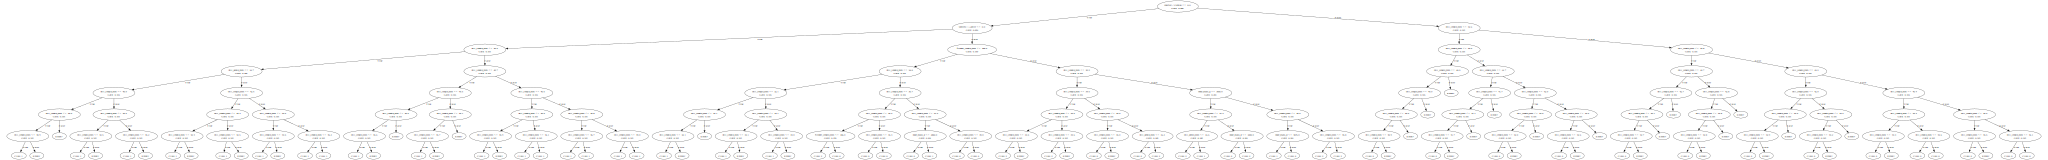

In [50]:
viz = tree_model.visualize()

viz

## Part 3: Naïve Bayes (40 points)

### Problem 3.1 (10 points)

In this exercise, you will learn the basics of using scikit-learn to implement a Naïve Bayes classifier. We will use the [Sentiment Polarity Dataset Version 2.0](https://www.cs.cornell.edu/people/pabo/movie-review-data/) for this exercise. This dataset contains 1000 positive and 1000 negative reviews. We have provided the code for dataset preprocessing.

1. (8 points) Train the multinomial Naïve Bayes model on the training set and test it on the test set. Report the accuracy of the model on the test set.
You would be able to achieve accuracy of around 80% on the test set. (Hint: Refer to the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) for more details on how to use the `MultinomialNB` class.)

2. (2 points) There are two functions of the Naïve Bayes classifier in order to get the probabilities of the predictions: `predict_proba` and `predict_log_proba`. What is the difference between them? What is the advantage of using `predict_log_proba` over `predict_proba`?

In [51]:
# Download and load the dataset

import nltk
from sklearn.datasets import load_files

nltk.download('movie_reviews', download_dir='.', quiet=True)
reviews = load_files('./corpora/movie_reviews', shuffle=True)

In [52]:
# Sentiment analysis: `neg` for negative sentiment, `pos` for positive sentiment
reviews.target_names

['neg', 'pos']

In [53]:
# Number of reviews
len(reviews.data)

2000

In [54]:
# Split the dataset into training and test sets

from sklearn.model_selection import train_test_split
reviews_train, reviews_test, y_train, y_test = train_test_split(
    reviews.data, reviews.target, test_size=0.20, random_state=12)

In [55]:
# Dataset preprocessing: convert reviews to a matrix of token counts

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer().fit(reviews.data) 
X_train = count_vect.transform(reviews_train).toarray()
X_test = count_vect.transform(reviews_test).toarray()

In [56]:
# Train and test with MultinomialNB

import numpy as np
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

# START YOUR CODE HERE
# Use the `MultinomialNB` class to train the model on the training set and test it on the test set
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
# END YOUR CODE HERE


# START YOUR CODE HERE
# Report the accuracy of the model on the test set
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
# END YOUR CODE HERE

Accuracy: 0.8175


The accuracy of my model was 81.75%.

In the following exercise, you will implement a Naïve Bayes classifier by yourself and compare it with the scikit-learn implementation. You will use the same dataset as in Problem 3.1.
We have provided a code skeleton for your implementation.

### Problem 3.2 (20 points)
Implement the `fit`, `predict_proba`, and `predict_log_proba` methods in the `NaiveBayes` class, according to what we have learned from lectures.
Each implementation is worth 8 points.
Please try to optimize for efficiency. Your code should run in seconds.

In [57]:
class NaiveBayes(object):
    """
    Your implementation of Naive Bayes classifier.
    """

    def __init__(self, alpha=1.0):
        """
        Initialize the Naive Bayes classifier.
        
        Parameters
        ----------
        alpha : float, default=1.0
            Additive (Laplace/Lidstone) smoothing parameter
            (0 for no smoothing).
        """

        self.alpha = alpha
    
    def fit(self, X, y):
        """
        Fit the Naive Bayes classifier on the training set (X, y).
        
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training vectors, where n_samples is the number of samples
            and n_features is the number of features.
        y : array-like, shape (n_samples,)
            Target values.
        """

        self.n_features = X.shape[1]
        self.n_samples = X.shape[0]
        self.n_classes = np.unique(y).shape[0]

        self.beta = np.zeros((self.n_classes, self.n_features))
        self.pi = np.zeros(self.n_classes)

        # START YOUR CODE HERE
        # Given (X, y), compute the parameters `beta` and `pi`
        # (Hint: Calculate `beta` according to the frequencies of words
        #    and `pi` according to the class frequencies.
        #    Remember to consider `alpha` for the Laplace smoothing.)
        class_cnt = np.bincount(y) # Count the occurences of each class
        laplace_cnt = class_cnt + self.alpha
        # Calculate probability that a randomly selected review is positive or negative
        self.pi = laplace_cnt / (laplace_cnt.sum())
        
        for c in range(self.n_classes):
            word_counts_per_class = X[y == c].sum(axis=0) # Calculate word counts for all samples in class c
            total_word_count = word_counts_per_class.sum() # Calculate total words per class c
            self.beta[c] = (word_counts_per_class + self.alpha) / (total_word_count + self.alpha * self.n_features)
        # END YOUR CODE HERE

        self.log_beta = np.log(self.beta)
        self.log_pi = np.log(self.pi)

    def predict_proba(self, X):
        """
        Return posterior probabilities of classification for X.
        
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Test vectors, where n_samples is the number of samples
            and n_features is the number of features.
        
        Returns
        -------
        y_prob : array-like, shape (n_samples, n_classes)
            Posterior probabilities of classification per class.
        """

        # START YOUR CODE HERE
        # Given `X``, return the posterior probabilities of classification
        # (Hint: Use `beta`` and `pi`. Remember to normalize the probabilities.)
        # Calculate log likelihood for each class
        log_likelihood = X @ self.log_beta.T + self.log_pi # Shape: (n_samples, n_classes)
        
        # Normalize probabilities
        max_log_likelihood = np.max(log_likelihood, axis=1, keepdims=True)
        log_likelihood -= max_log_likelihood
        exp_log_likelihood = np.exp(log_likelihood)
        y_prob = exp_log_likelihood / np.sum(exp_log_likelihood, axis=1, keepdims=True)
        
        return y_prob
        # END YOUR CODE HERE
        
        pass

    def predict_log_proba(self, X):
        """
        Return posterior log probabilities of classification for X.
        
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Test vectors, where n_samples is the number of samples
            and n_features is the number of features.
        
        Returns
        -------
        y_log_prob : array-like, shape (n_samples, n_classes)
            Posterior log probabilities of classification per class.
        """

        # START YOUR CODE HERE
        # Given X, return the posterior log probabilities of classification
        # (Hint: Use `log_beta`` and `log_pi`.)
        # Calculate log likelihood for each class
        log_likelihood = X @ self.log_beta.T + self.log_pi # Shape: (n_samples, n_classes)
        
        # Normalize to get log probabilities
        max_log_likelihood = np.max(log_likelihood, axis=1, keepdims=True)
        log_likelihood -= max_log_likelihood
        log_sum_exp = np.log(np.sum(np.exp(log_likelihood), axis=1, deepdims=True))
        y_log_prob = log_likelihood - log_sum_exp
        
        return y_log_prob
        # END YOUR CODE HERE

        pass

In [58]:
my_clf = NaiveBayes()
my_clf.fit(X_train, y_train)

# Sanity checks
assert my_clf.n_features == X_train.shape[1]
assert my_clf.n_samples == X_train.shape[0]
assert my_clf.n_classes == np.unique(y_train).shape[0]
assert my_clf.beta.shape == (my_clf.n_classes, my_clf.n_features)
assert my_clf.pi.shape == (my_clf.n_classes,)
assert np.isclose(my_clf.pi.sum(), 1)
assert np.allclose(my_clf.beta.sum(axis=1), 1)

### Problem 3.3 (10 points)

Compare the performance of your implementation with sklearn's implementation on the test set.
Report the accuracy of both implementations on the test set.
Ideally, you should be able to achieve accuracy of around 80% on the test set, similar to the scikit-learn implementation.

In [59]:
# START YOUR CODE HERE
pred_proba = clf.predict_proba(X_test)
pred_log_proba = clf.predict_log_proba(X_test)

# Report the accuracy of your implementation on the test set
# Convert probabilities to predicted class labels
pred_classes_proba = np.argmax(pred_proba, axis=1)
pred_classes_log_proba = np.argmax(np.exp(pred_log_proba), axis=1) 

# Report the accuracy of your implementation on the test set
accuracy_proba = accuracy_score(y_test, pred_classes_proba)
print("Accuracy using predict_proba:", accuracy_proba)

accuracy_log_proba = accuracy_score(y_test, pred_classes_log_proba)
print("Accuracy using predict_log_proba:", accuracy_log_proba)
# END YOUR CODE HERE

Accuracy using predict_proba: 0.8175
Accuracy using predict_log_proba: 0.8175


## Part 4: Logistic Regression (50 points)
In this problem, you'll build a logistic regression model using PyTorch for sentiment classification using the Stanford Sentiment Treebank (SST-2) dataset. You will experiment with various hyperparameters to improve model performance. 

###  Problem 4.1: PyTorch Implementation for Logistic Regression (10 Points)
In this task, you will define a logistic regression model using PyTorch. Specifically, you need to create a linear layer that maps the input features to a single output.

In [39]:
import torch
import torch.nn as nn

class LogisticRegression(nn.Module):
    """
    Logistic Regression model using PyTorch.
    
    Parameters
    ----------
    input_features : int
        Number of input features (dimensionality of the feature space).
    """
    def __init__(self, input_features):
        """
        Initialize the LogisticRegression model with a single linear layer.
        
        Parameters
        ----------
        input_features : int
            Number of input features.
        """
        super(LogisticRegression, self).__init__()
        # START YOUR CODE HERE
        # Define a single linear layer to map input_features to 1 output.
        self.linear = nn.Linear(input_features, 1)
        # END YOUR CODE HERE
    
    def forward(self, x):
        """
        Forward pass through the model.
        
        Parameters
        ----------
        x : torch.Tensor
            Input tensor (batch_size, input_features).
        
        Returns
        -------
        logits : torch.Tensor
            Output tensor (batch_size, 1) before applying sigmoid.
        """
        # START YOUR CODE HERE
        # Perform the forward pass using the linear layer.
        logits = self.linear(x)
        return logits
        # END YOUR CODE HERE

# Initialize the model with the number of input features
input_features = 5000  # This corresponds to the feature dimension from CountVectorizer
model = LogisticRegression(input_features=input_features)


### Problem 4.2: Sigmoid and Loss Function Implementation (10 Points)
In this task, you will implement the sigmoid function and set up PyTorch's built-in binary cross-entropy with logits. Specifically, use the `BCEWithLogitsLoss` function, which combines the sigmoid and cross-entropy loss for numerical stability.

In [40]:
def sigmoid(z):
    """
    Sigmoid function. Compute the sigmoid of z.
    
    Parameters
    ----------
    z : torch.Tensor
        Input tensor (logits).
    
    Returns
    -------
    torch.Tensor
        Output tensor after applying the sigmoid function.
    """
    # START YOUR CODE HERE
    # Implement the sigmoid function
    sigmoid_z = 1 / (1 + torch.exp(-z))
    return sigmoid_z
    # END YOUR CODE HERE

In [41]:
# Testing the sigmoid function
print('Testing sigmoid function...')
z = torch.tensor([-2.0, -1.0, 0.0, 1.0, 2.0])
expected_output = torch.tensor([0.1192, 0.2689, 0.5000, 0.7311, 0.8808])
assert torch.allclose(sigmoid(z), expected_output, atol=1e-4), 'Sigmoid test failed!'
print('Sigmoid test passed!')

Testing sigmoid function...
Sigmoid test passed!


In [42]:
# START YOUR CODE HERE
# Using PyTorch's built-in binary cross-entropy with logits which internally applies sigmoid
criterion = nn.BCEWithLogitsLoss()
# END YOUR CODE HERE

In [43]:
# Testing BCEWithLogitsLoss function
print('Testing BCEWithLogitsLoss function...')
logits = torch.tensor([[0.8], [1.2], [-0.5]], requires_grad=True)  # Example logits
targets = torch.tensor([[1.0], [0.0], [1.0]])  # Corresponding target labels
expected_loss = torch.tensor(0.93615)  # Correctly computed expected loss

# Calculate the loss using BCEWithLogitsLoss
loss = criterion(logits, targets)

# Ensure that the computed loss is close to the expected value
assert torch.allclose(loss, expected_loss, atol=1e-4), 'BCEWithLogitsLoss test failed!'
print('BCEWithLogitsLoss test passed!')

Testing BCEWithLogitsLoss function...
BCEWithLogitsLoss test passed!


### Problem 4.3: Dataset and Training (10 Points)
In this task, you will use the Stanford Sentiment Treebank (SST-2) dataset for binary sentiment classification. You will preprocess the dataset, vectorize the text data, and train the logistic regression model.

In [44]:
from datasets import load_dataset
from transformers import AutoTokenizer
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.feature_extraction.text import CountVectorizer

# Load the SST-2 dataset
dataset = load_dataset("glue", "sst2")

# Tokenizer for basic processing (not used in vectorization here)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Use CountVectorizer for feature extraction
vectorizer = CountVectorizer(max_features=5000)

# Fit vectorizer and prepare features
train_texts = [example['sentence'] for example in dataset['train']]
vectorizer.fit(train_texts)

def vectorize_data(texts):
    """
    Vectorize text data using CountVectorizer.
    
    Parameters
    ----------
    texts : list of str
        List of sentences to be vectorized.
    
    Returns
    -------
    torch.FloatTensor
        Vectorized text data as tensor.
    """
    return torch.FloatTensor(vectorizer.transform(texts).toarray())

# Vectorize datasets
X_train = vectorize_data([example['sentence'] for example in dataset['train']])
X_val = vectorize_data([example['sentence'] for example in dataset['validation']])
X_test = vectorize_data([example['sentence'] for example in dataset['test']])

# Convert labels
y_train = torch.tensor(dataset['train']['label'], dtype=torch.float32).unsqueeze(1)
y_val = torch.tensor(dataset['validation']['label'], dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(dataset['test']['label'], dtype=torch.float32).unsqueeze(1) if 'test' in dataset else None

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test) if y_test is not None else None

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32) if test_dataset else None

print(f"Feature matrix shape for train: {X_train.shape}")

Feature matrix shape for train: torch.Size([67349, 5000])


Epoch 1/10, Loss: 0.6754168412181374
Validation Loss: 0.6594190001487732
ROC-AUC: 0.7109171086974824


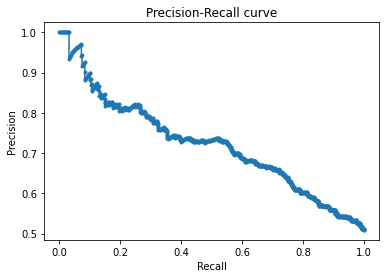

Epoch 2/10, Loss: 0.6573789364934817
Validation Loss: 0.6386922597885132
ROC-AUC: 0.7380546434284752


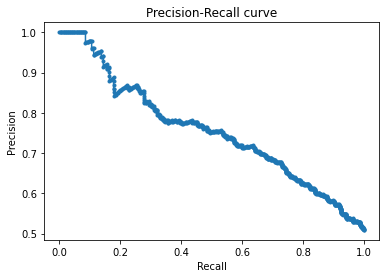

Epoch 3/10, Loss: 0.6443650569315478
Validation Loss: 0.6229981184005737
ROC-AUC: 0.7587248463416687


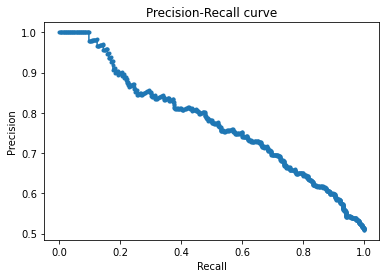

Epoch 4/10, Loss: 0.6334785478132071
Validation Loss: 0.6103416085243225
ROC-AUC: 0.7733171255367518


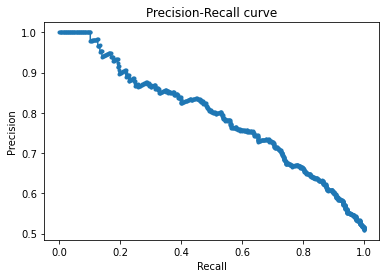

Epoch 5/10, Loss: 0.6239983438596023
Validation Loss: 0.5990346670150757
ROC-AUC: 0.7841363559821504


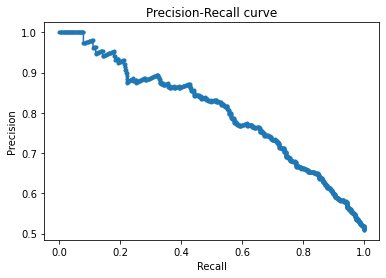

Epoch 6/10, Loss: 0.6156077877076391
Validation Loss: 0.5894412398338318
ROC-AUC: 0.7914982739749095


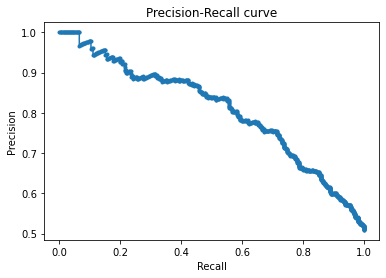

Epoch 7/10, Loss: 0.6080785330287635
Validation Loss: 0.5814408659934998
ROC-AUC: 0.7985076197693021


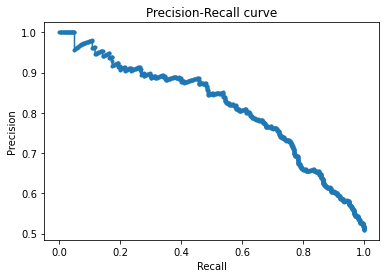

Epoch 8/10, Loss: 0.6012123740200759
Validation Loss: 0.5739027857780457
ROC-AUC: 0.8059905700092616


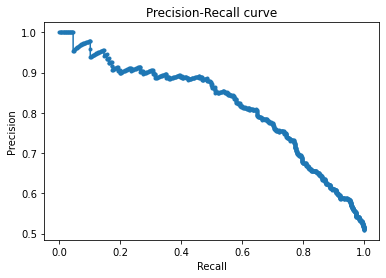

Epoch 9/10, Loss: 0.5948985683521579
Validation Loss: 0.5676633715629578
ROC-AUC: 0.8102687968342175


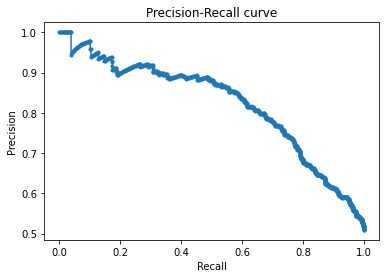

Epoch 10/10, Loss: 0.5890721273393925
Validation Loss: 0.5618576407432556
ROC-AUC: 0.8133630125452556


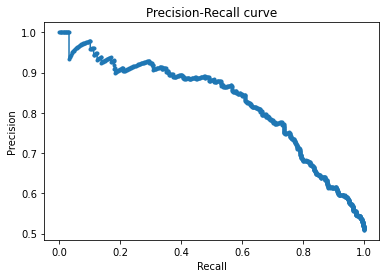

In [45]:
from sklearn.metrics import roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt

# Train the model

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Example optimizer

def train_and_evaluate(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    """
    Train and evaluate the logistic regression model.
    
    Parameters
    ----------
    model : nn.Module
        The logistic regression model.
    train_loader : DataLoader
        DataLoader for the training set.
    val_loader : DataLoader
        DataLoader for the validation set.
    criterion : callable
        Loss function.
    optimizer : torch.optim.Optimizer
        Optimization algorithm.
    epochs : int, default=10
        Number of training epochs.
    """
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for batch_X, batch_y in train_loader:
            # START YOUR CODE HERE
            # Implement the training loop:
            # 1. Zero the optimizer gradients.
            optimizer.zero_grad()
            # 2. Perform a forward pass. 
            logits = model(batch_X)
            # 3. Compute the loss using the criterion. 
            loss = criterion(logits, batch_y)
            # 4. Perform backward pass and update weights using optimizer.
            loss.backward()
            optimizer.step()
            # 5. Update the running loss. 
            running_loss += loss.item()
            pass
            # END YOUR CODE HERE
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")
        
        # Validation
        model.eval()
        with torch.no_grad():
            # START YOUR CODE HERE
            # Initialize lists to store validation predictions and true labels
            val_logits = []
            val_true = []
            # Implement validation:
            # Iterate through validation data
            for batch_X, batch_y in val_loader:
                batch_logits = model(batch_X) # Perform a forward pass
                val_logits.append(batch_logits) # Store batch predictions
                val_true.append(batch_y) # Store true labels
                
            # 1. Concatenate logits from the model. 
            val_logits = torch.cat(val_logits)
            # 2. Compute validation loss. 
            val_true = torch.cat(val_true) # Concatenate true labels
            val_loss = criterion(val_logits, val_true) 
            print(f"Validation Loss: {val_loss.item()}")
        
            # 3. Calculate ROC-AUC score. 
            val_preds = torch.sigmoid(val_logits).cpu().numpy() # Apply sigmoid
            roc_auc = roc_auc_score(val_true, val_preds)
            print(f"ROC-AUC: {roc_auc}")
            
            # 4. Plot Precision-Recall curve.
            precision, recall, _ = precision_recall_curve(val_true, val_preds)
            plt.plot(recall, precision, marker='.')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title('Precision-Recall curve')
            plt.show()
            # END YOUR CODE HERE

train_and_evaluate(model, train_loader, val_loader, criterion, optimizer)

### Problem 4.4: Hyperparameter Tuning (20 Points)
In this task, you will experiment with various hyperparameters. You will:
1. (5 points) Test different learning rates.
2. (5 points) Test different batch sizes.
3. (5 points) Experiment with applying feature normalization.
4. (5 points) Compare the performance of different optimizers (e.g., SGD vs. Adam).

For each task, fill in the code to perform the experiment and **document how the changes affect the model's performance**.

#### Problem 4.4.1: Tune Learning Rate (5 points)
We show the code for this part as an example. Please run the code and document the results.


Training with learning rate: 0.001
Epoch 1/10, Loss: 0.5910097137624464
Validation Loss: 0.5053465366363525
ROC-AUC: 0.8675275743032753


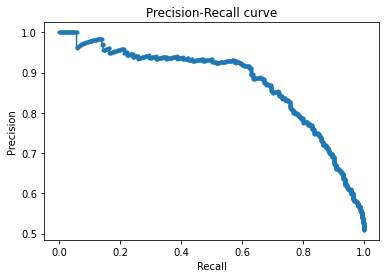

Epoch 2/10, Loss: 0.4807365687612683
Validation Loss: 0.45356935262680054
ROC-AUC: 0.8802833207038815


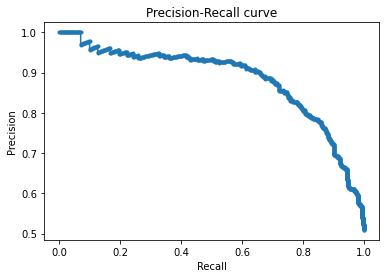

Epoch 3/10, Loss: 0.4248084885207604
Validation Loss: 0.4341597855091095
ROC-AUC: 0.8850614633324914


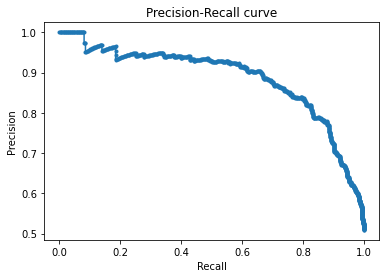

Epoch 4/10, Loss: 0.38951975369821534
Validation Loss: 0.42681771516799927
ROC-AUC: 0.8884977266986611


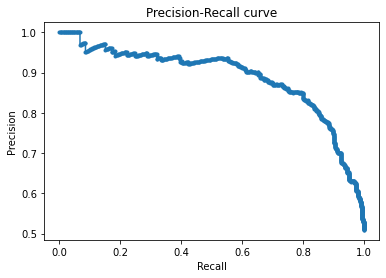

Epoch 5/10, Loss: 0.3648547553110009
Validation Loss: 0.42776501178741455
ROC-AUC: 0.8904500294687211


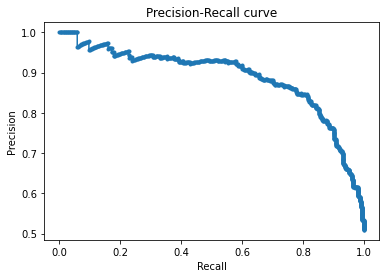

Epoch 6/10, Loss: 0.3465806967926139
Validation Loss: 0.4286477267742157
ROC-AUC: 0.8913551401869158


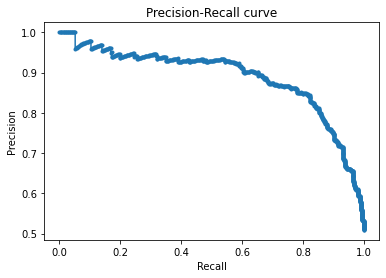

Epoch 7/10, Loss: 0.33241972738518566
Validation Loss: 0.43406468629837036
ROC-AUC: 0.8916287783110213


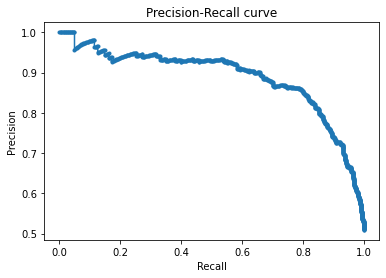

Epoch 8/10, Loss: 0.32113733472138856
Validation Loss: 0.43899643421173096
ROC-AUC: 0.891791908731161


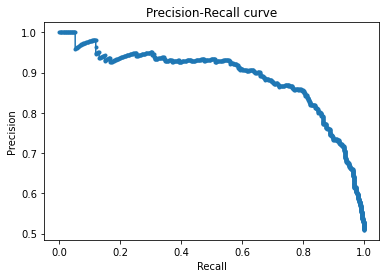

Epoch 9/10, Loss: 0.3119198253418091
Validation Loss: 0.44213131070137024
ROC-AUC: 0.8915708933232298


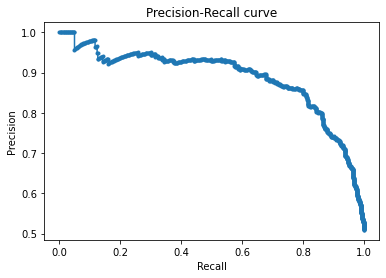

Epoch 10/10, Loss: 0.30421537682591027
Validation Loss: 0.4502948522567749
ROC-AUC: 0.8918182200892482


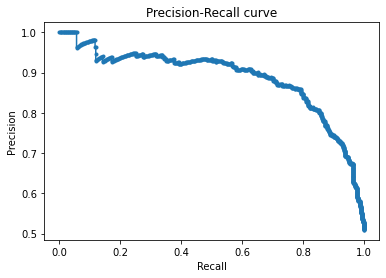


Training with learning rate: 0.01
Epoch 1/10, Loss: 0.4180121830834912
Validation Loss: 0.43521133065223694
ROC-AUC: 0.8909499452723751


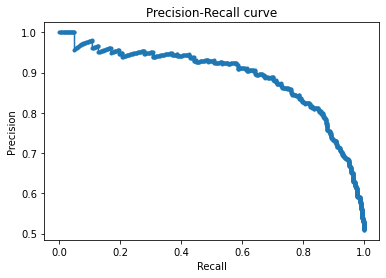

Epoch 2/10, Loss: 0.3078956939439309
Validation Loss: 0.5085470080375671
ROC-AUC: 0.8869769302012293


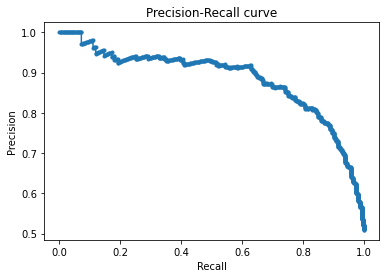

Epoch 3/10, Loss: 0.2816758861875874
Validation Loss: 0.5601626634597778
ROC-AUC: 0.8850772501473436


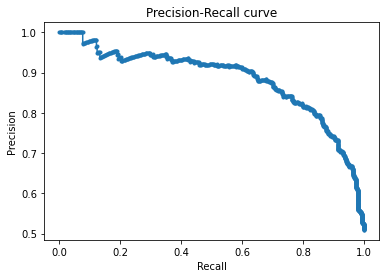

Epoch 4/10, Loss: 0.26954543467726105
Validation Loss: 0.6166099905967712
ROC-AUC: 0.8812515786814852


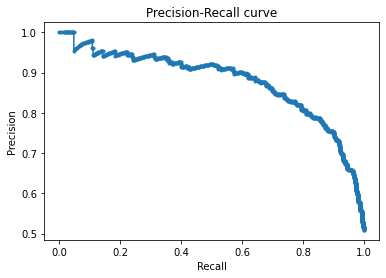

Epoch 5/10, Loss: 0.2627056285951313
Validation Loss: 0.6747888922691345
ROC-AUC: 0.8782073545508124


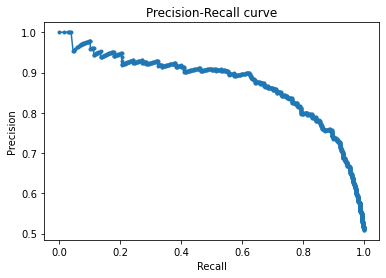

Epoch 6/10, Loss: 0.2583765951018435
Validation Loss: 0.7094191908836365
ROC-AUC: 0.8772969815610002


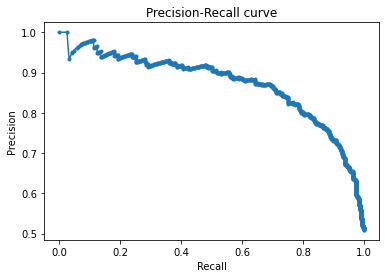

Epoch 7/10, Loss: 0.2549938325095488
Validation Loss: 0.7274455428123474
ROC-AUC: 0.8758814304959165


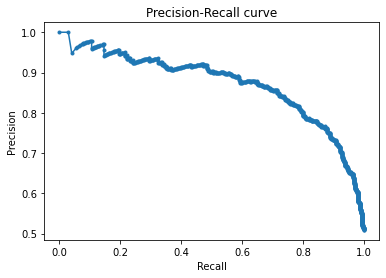

Epoch 8/10, Loss: 0.2531127848598283
Validation Loss: 0.781934916973114
ROC-AUC: 0.8734528921444809


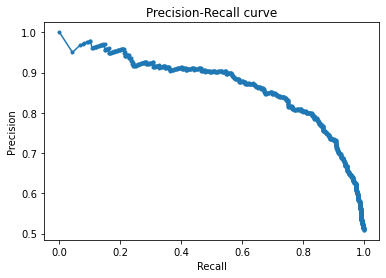

Epoch 9/10, Loss: 0.2512521668879267
Validation Loss: 0.8155218958854675
ROC-AUC: 0.871234844657742


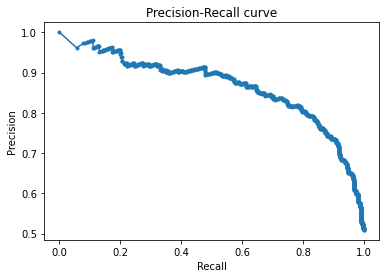

Epoch 10/10, Loss: 0.24998173161880988
Validation Loss: 0.8378831148147583
ROC-AUC: 0.8702271196430075


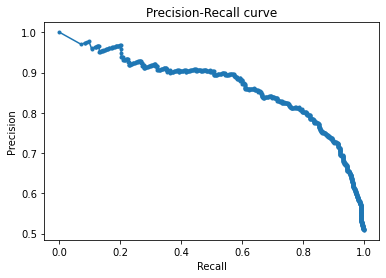


Training with learning rate: 0.1
Epoch 1/10, Loss: 0.46061533714275177
Validation Loss: 1.1506879329681396
ROC-AUC: 0.8628494148353961


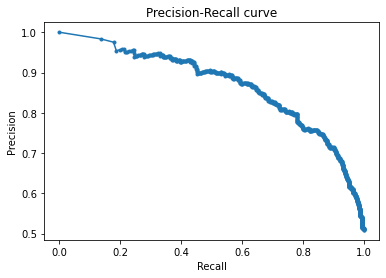

Epoch 2/10, Loss: 0.44179858031401725
Validation Loss: 1.2776007652282715
ROC-AUC: 0.8523643386377032


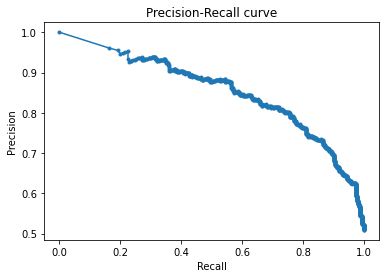

Epoch 3/10, Loss: 0.43763474527383645
Validation Loss: 1.4518649578094482
ROC-AUC: 0.8495805969520922


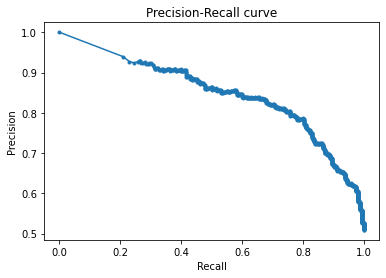

Epoch 4/10, Loss: 0.43890919778628756
Validation Loss: 1.574141502380371
ROC-AUC: 0.8475019996632146


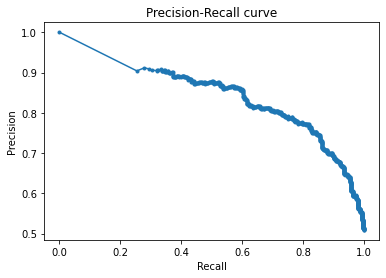

Epoch 5/10, Loss: 0.4375101119748841
Validation Loss: 1.6589395999908447
ROC-AUC: 0.8512303191041508


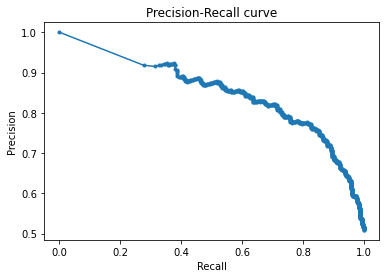

Epoch 6/10, Loss: 0.43923021892700653
Validation Loss: 1.7041209936141968
ROC-AUC: 0.8468415845752295


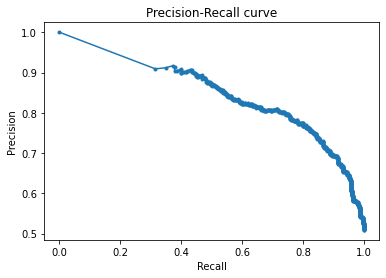

Epoch 7/10, Loss: 0.4410169769821781
Validation Loss: 1.740639090538025
ROC-AUC: 0.8454128778311021


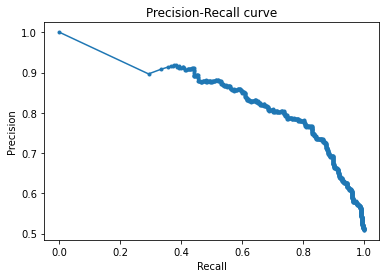

Epoch 8/10, Loss: 0.43611093987213034
Validation Loss: 1.8421066999435425
ROC-AUC: 0.8464048160309844


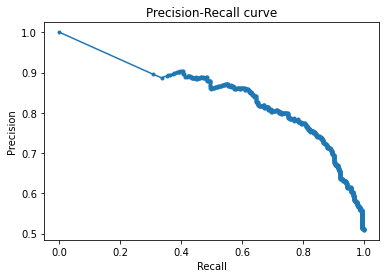

Epoch 9/10, Loss: 0.4342372560046277
Validation Loss: 1.964158058166504
ROC-AUC: 0.8429790772080492


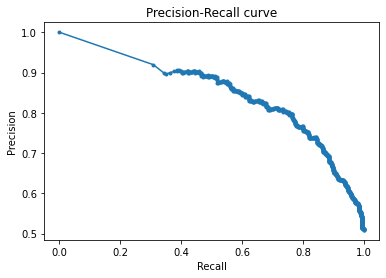

Epoch 10/10, Loss: 0.43689330580009417
Validation Loss: 1.8649518489837646
ROC-AUC: 0.854913909236339


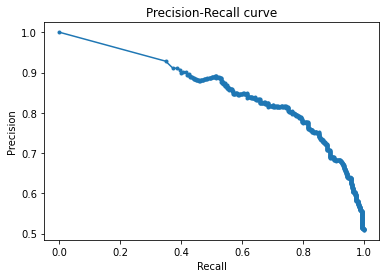

In [12]:
def tune_learning_rate(train_loader, val_loader):
    """
    Experiment with different learning rates for logistic regression.
    
    Parameters
    ----------
    train_loader : DataLoader
        DataLoader for the training set.
    val_loader : DataLoader
        DataLoader for the validation set.
    """
    learning_rates = [0.001, 0.01, 0.1]
    
    for lr in learning_rates:
        print(f"\nTraining with learning rate: {lr}")

        # 1. Initialize the model with the appropriate number of features. model = ...
        model = LogisticRegression(input_features=5000)
        # 2. Initialize the optimizer with the given learning rate. optimizer = ...
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        # 3. Train and evaluate the model.
        train_and_evaluate(model, train_loader, val_loader, criterion, optimizer, epochs=10)

tune_learning_rate(train_loader, val_loader)

We see that the learning rate has a significant impact on the model's performance. The lower learning rates perform better overall, with 0.001 performing the best in terms of ROC-AUC and validation loss. As the learning rate increases to 0.1, we observe more overfitting.

#### Problem 4.4.2: Tune Batch Size (5 points)
Hint: You can modify the batch size in the DataLoader.


Training with batch size: 16
Epoch 1/10, Loss: 0.6667535383882546
Validation Loss: 0.6393341422080994
ROC-AUC: 0.7352445903847772


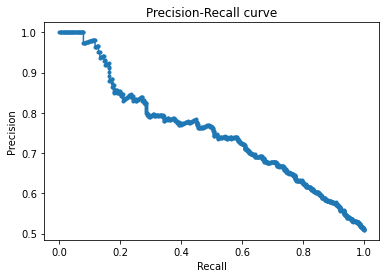

Epoch 2/10, Loss: 0.6393044183132485
Validation Loss: 0.610561728477478
ROC-AUC: 0.7706017933821672


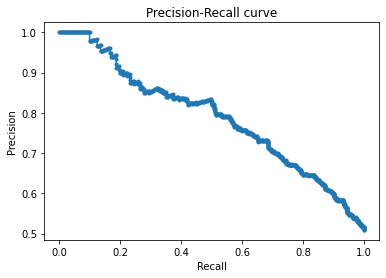

Epoch 3/10, Loss: 0.6201675711788078
Validation Loss: 0.5901983976364136
ROC-AUC: 0.7910509808874295


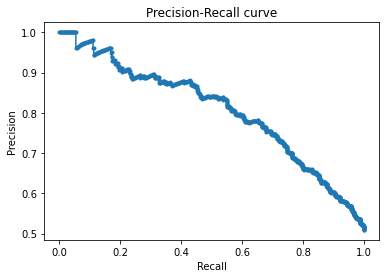

Epoch 4/10, Loss: 0.6049719117104017
Validation Loss: 0.5746695399284363
ROC-AUC: 0.8043382167213942


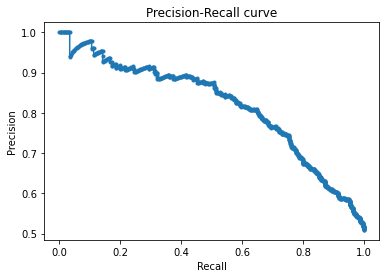

Epoch 5/10, Loss: 0.5923063811737681
Validation Loss: 0.5622760057449341
ROC-AUC: 0.8129683421739498


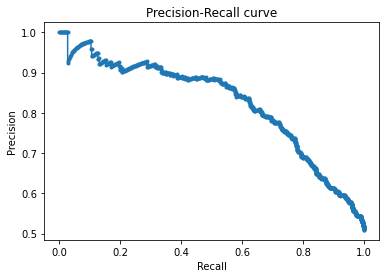

Epoch 6/10, Loss: 0.5814168354040653
Validation Loss: 0.5520547032356262
ROC-AUC: 0.8188673486570683


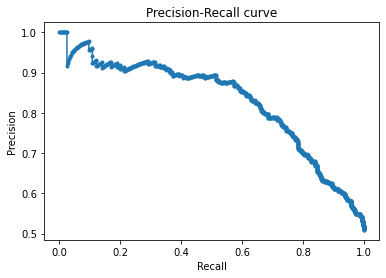

Epoch 7/10, Loss: 0.57185021933354
Validation Loss: 0.5434128046035767
ROC-AUC: 0.8237559989896438


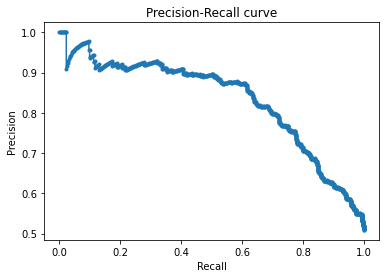

Epoch 8/10, Loss: 0.5633116338570158
Validation Loss: 0.5359636545181274
ROC-AUC: 0.8279289803822514


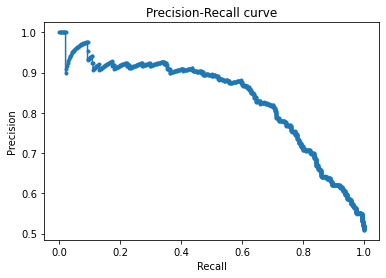

Epoch 9/10, Loss: 0.5555973837890987
Validation Loss: 0.5294429659843445
ROC-AUC: 0.8313336701187167


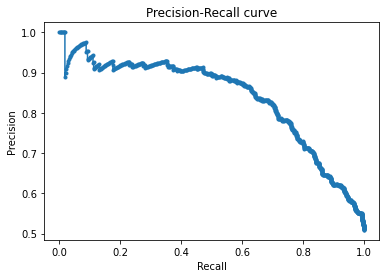

Epoch 10/10, Loss: 0.5485603146485082
Validation Loss: 0.5236635208129883
ROC-AUC: 0.8343226403974067


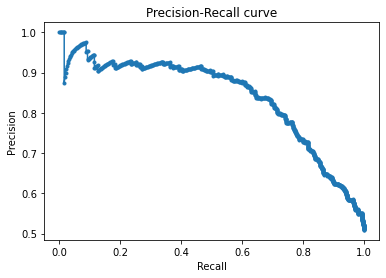


Training with batch size: 32
Epoch 1/10, Loss: 0.6752589318078374
Validation Loss: 0.6596920490264893
ROC-AUC: 0.711038140944683


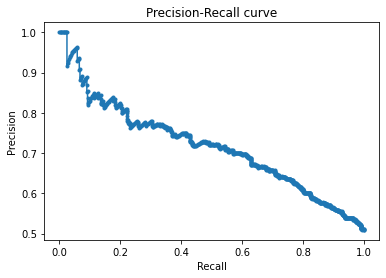

Epoch 2/10, Loss: 0.6571872865219297
Validation Loss: 0.6390586495399475
ROC-AUC: 0.73641807695546


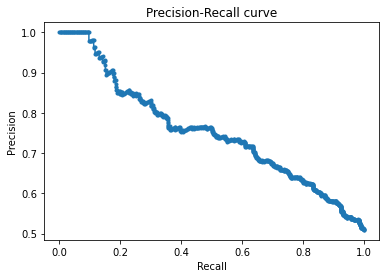

Epoch 3/10, Loss: 0.6442216079195435
Validation Loss: 0.6232709884643555
ROC-AUC: 0.7559411046560578


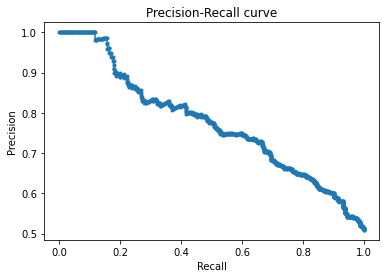

Epoch 4/10, Loss: 0.6333511526397742
Validation Loss: 0.6103358268737793
ROC-AUC: 0.7710017260250905


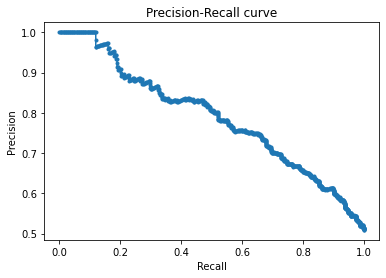

Epoch 5/10, Loss: 0.6239052387994145
Validation Loss: 0.5994039177894592
ROC-AUC: 0.7821103814094468


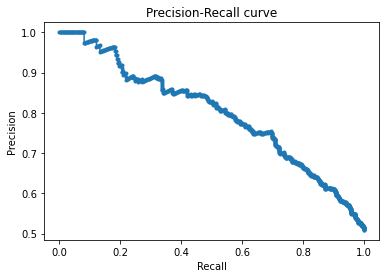

Epoch 6/10, Loss: 0.6155307241686733
Validation Loss: 0.5899827480316162
ROC-AUC: 0.791377241727709


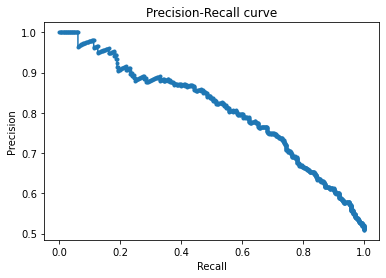

Epoch 7/10, Loss: 0.6079971983285528
Validation Loss: 0.5817431807518005
ROC-AUC: 0.7983971120653364


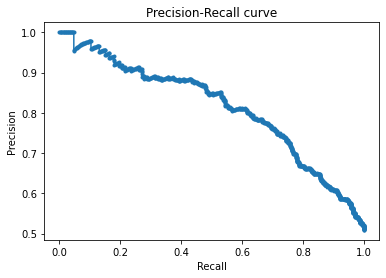

Epoch 8/10, Loss: 0.6011429363786467
Validation Loss: 0.5744500756263733
ROC-AUC: 0.8038751368190622


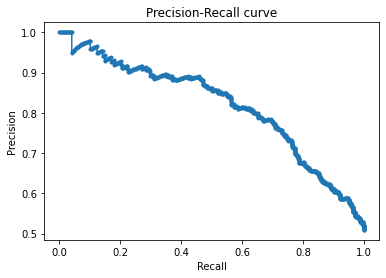

Epoch 9/10, Loss: 0.5948497753953141
Validation Loss: 0.5679294466972351
ROC-AUC: 0.8087164267070809


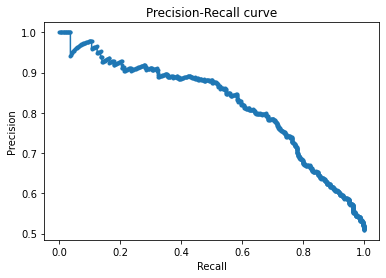

Epoch 10/10, Loss: 0.5890286822924987
Validation Loss: 0.5620489120483398
ROC-AUC: 0.8127789003957229


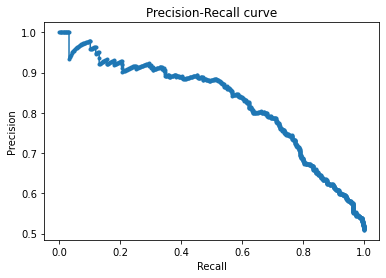


Training with batch size: 64
Epoch 1/10, Loss: 0.6810957235828085
Validation Loss: 0.6732016801834106
ROC-AUC: 0.7014423886503325


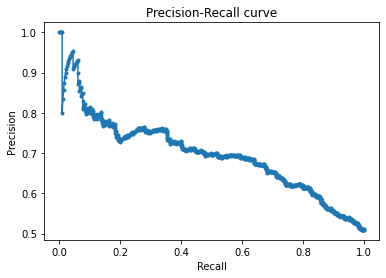

Epoch 2/10, Loss: 0.6692352187939179
Validation Loss: 0.659256637096405
ROC-AUC: 0.7117169739833291


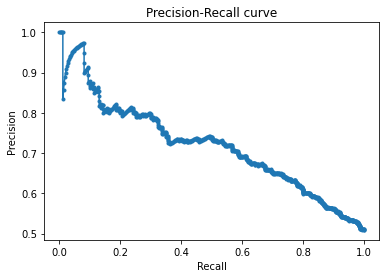

Epoch 3/10, Loss: 0.6608324584118661
Validation Loss: 0.6481870412826538
ROC-AUC: 0.7239780668518987


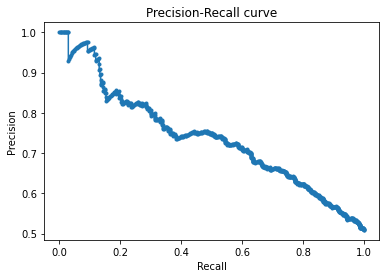

Epoch 4/10, Loss: 0.6536645994566784
Validation Loss: 0.6387682557106018
ROC-AUC: 0.7363865033257556


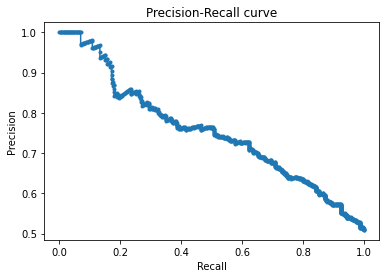

Epoch 5/10, Loss: 0.6472506109918738
Validation Loss: 0.6304860711097717
ROC-AUC: 0.7473215037467373


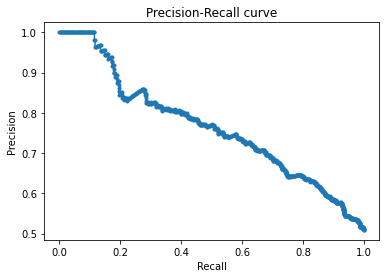

Epoch 6/10, Loss: 0.6413933169468176
Validation Loss: 0.6230672597885132
ROC-AUC: 0.7559832028289972


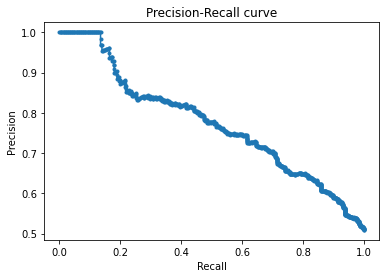

Epoch 7/10, Loss: 0.6359843594169798
Validation Loss: 0.6163429617881775
ROC-AUC: 0.7642291824534816


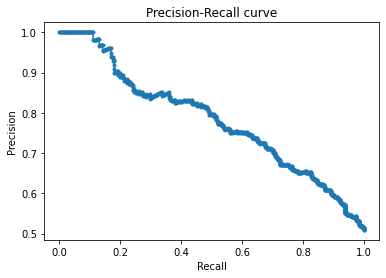

Epoch 8/10, Loss: 0.6309518525403449
Validation Loss: 0.6101972460746765
ROC-AUC: 0.7710017260250905


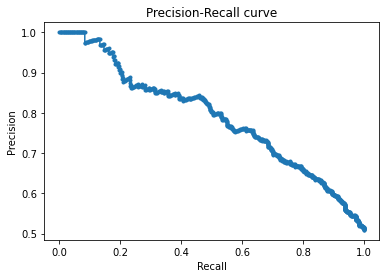

Epoch 9/10, Loss: 0.6262426581817475
Validation Loss: 0.6045442819595337
ROC-AUC: 0.77700071566894


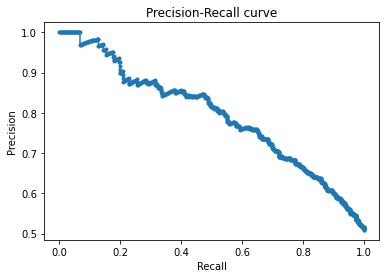

Epoch 10/10, Loss: 0.6218151247512694
Validation Loss: 0.5993178486824036
ROC-AUC: 0.782484002694283


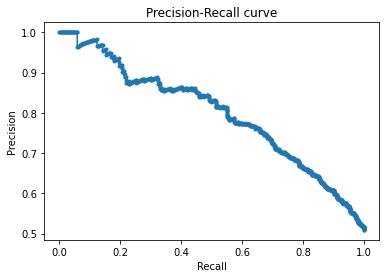

In [18]:
def tune_batch_size(train_dataset, val_loader):
    """
    Experiment with different batch sizes for logistic regression.
    
    Parameters
    ----------
    train_dataset : TensorDataset
        Training dataset.
    val_loader : DataLoader
        DataLoader for the validation set.
    """
    batch_sizes = [16, 32, 64]
    
    for batch_size in batch_sizes:
        print(f"\nTraining with batch size: {batch_size}")
        # START YOUR CODE HERE
        # 1. Create a new DataLoader with the specified batch size. train_loader = ...
        train_loader = DataLoader(train_dataset, batch_size=batch_size)
        # 2. Initialize the model with the appropriate number of features. model = ...
        model = LogisticRegression(input_features=5000)
        # 3. Initialize the optimizer. optimizer = ...
        optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
        # 4. Train and evaluate the model.
        train_and_evaluate(model, train_loader, val_loader, criterion, optimizer, epochs=10)
        # END YOUR CODE HERE
tune_batch_size(train_dataset, val_loader)

We can see that the batch size also has a significant impact on the model's performance. The lower batch sizes performed better overall, with the batch size of 16 performing the best with the highest ROC-AUC score.

#### Problem 4.4.3: Experiment with Feature Normalization (5 points)
Here, we standardize the input features (i.e., normalize them to have zero mean and unit variance). This could help with improving model convergence and performance.

Epoch 1/10, Loss: 0.4838757727392496
Validation Loss: 1.0545285940170288
ROC-AUC: 0.8861033931127389


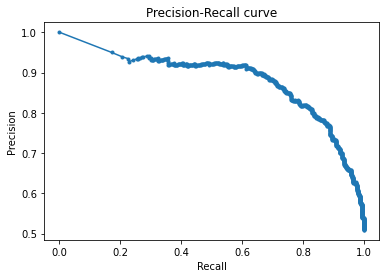

Epoch 2/10, Loss: 0.3512378505371387
Validation Loss: 1.0094828605651855
ROC-AUC: 0.8827329081417867


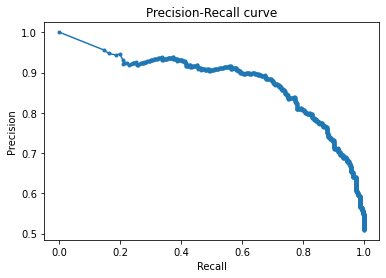

Epoch 3/10, Loss: 0.30881904863759063
Validation Loss: 0.9895951747894287
ROC-AUC: 0.8780468552664814


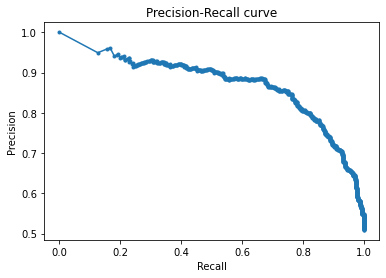

Epoch 4/10, Loss: 0.2894193254605891
Validation Loss: 0.985906183719635
ROC-AUC: 0.8744053633072325


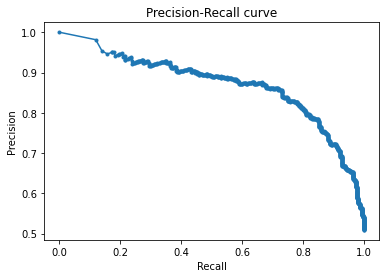

Epoch 5/10, Loss: 0.2778187888526223
Validation Loss: 0.9724934697151184
ROC-AUC: 0.8724635850804074


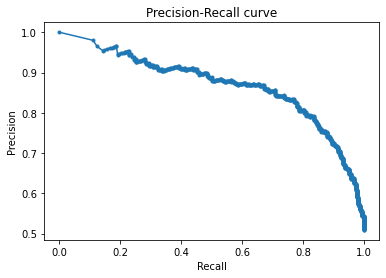

Epoch 6/10, Loss: 0.27145152305144454
Validation Loss: 0.9679759740829468
ROC-AUC: 0.8709533131262103


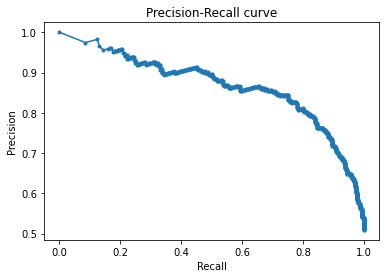

Epoch 7/10, Loss: 0.2673089317857971
Validation Loss: 0.9550142288208008
ROC-AUC: 0.869721941567736


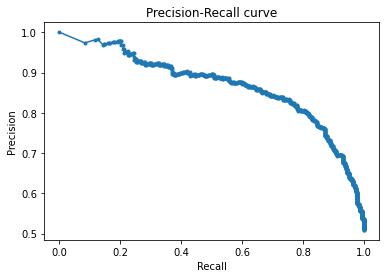

Epoch 8/10, Loss: 0.2648503534486982
Validation Loss: 0.9636647701263428
ROC-AUC: 0.868190620527069


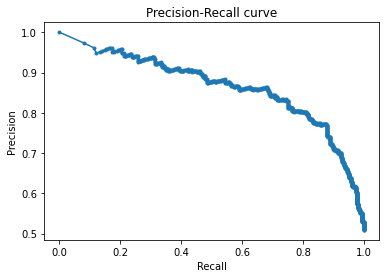

Epoch 9/10, Loss: 0.26276005920987233
Validation Loss: 0.9543532729148865
ROC-AUC: 0.8678775153658331


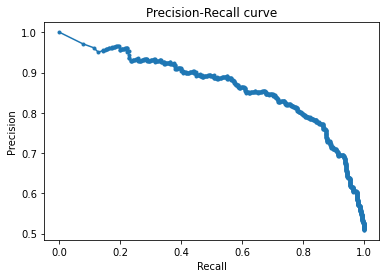

Epoch 10/10, Loss: 0.2609684657871794
Validation Loss: 0.9425190091133118
ROC-AUC: 0.8676643933653279


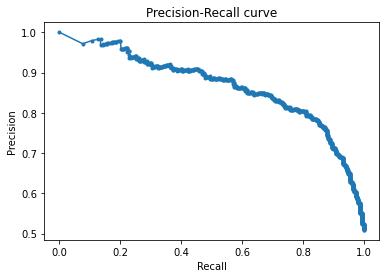

In [19]:
def apply_feature_normalization(X_train, X_val):
    """
    Apply feature normalization to the input data.
    
    Parameters
    ----------
    X_train : torch.FloatTensor
        Training data matrix.
    X_val : torch.FloatTensor
        Validation data matrix.
    
    Returns
    -------
    X_train_normalized : torch.FloatTensor
        Normalized training data.
    X_val_normalized : torch.FloatTensor
        Normalized validation data.
    """
    
    # START YOUR CODE HERE
    # Calculate mean and standard deviation from the training set
    mean = X_train.mean(dim=0, keepdim=True)
    std = X_train.std(dim=0, keepdim=True)
    
    # Apply feature normalization to the input data.
    # Normalize the training data
    X_train_normalized = (X_train - mean) / std

    # Normalize the validation data using the training set mean and std
    X_val_normalized = (X_val - mean) / std
    
    # END YOUR CODE HERE
    
    return X_train_normalized, X_val_normalized

# Normalize the train and validation sets
X_train_normalized, X_val_normalized = apply_feature_normalization(X_train, X_val)

# Re-create DataLoaders with the normalized features
train_dataset_normalized = TensorDataset(X_train_normalized, y_train)
val_dataset_normalized = TensorDataset(X_val_normalized, y_val)

train_loader_normalized = DataLoader(train_dataset_normalized, batch_size=32, shuffle=True)
val_loader_normalized = DataLoader(val_dataset_normalized, batch_size=32)

# Train the model using normalized features
train_and_evaluate(model, train_loader_normalized, val_loader_normalized, criterion, optimizer, epochs=10)


Normalizing the input features seem to help improve convergence of my model, but compared to our previous too experiments, it appears to yield a higher validation loss.  

#### Problem 4.4.4: Experiment with Different Optimizers (5 points)
Here, we try different optimizers (e.g., SGD, Adam) to observe how they affect the training performance.


Training with optimizer: SGD
Epoch 1/10, Loss: 0.6924218002804101
Validation Loss: 0.6925599575042725
ROC-AUC: 0.5284925696724763


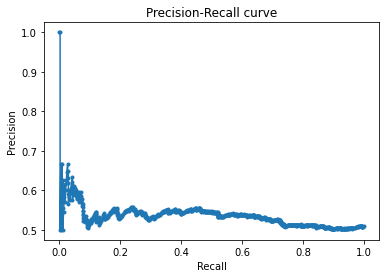

Epoch 2/10, Loss: 0.6924221027492061
Validation Loss: 0.6925599575042725
ROC-AUC: 0.5284925696724763


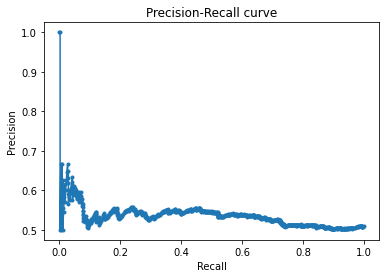

Epoch 3/10, Loss: 0.692422055546858
Validation Loss: 0.6925599575042725
ROC-AUC: 0.5284925696724763


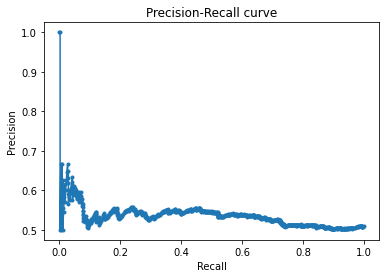

Epoch 4/10, Loss: 0.692422235946474
Validation Loss: 0.6925599575042725
ROC-AUC: 0.5284925696724763


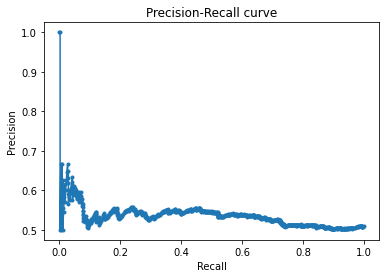

Epoch 5/10, Loss: 0.6924223049236307
Validation Loss: 0.6925599575042725
ROC-AUC: 0.5284925696724763


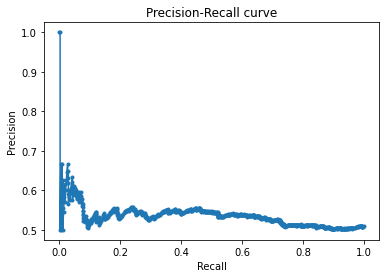

Epoch 6/10, Loss: 0.6924216062042888
Validation Loss: 0.6925599575042725
ROC-AUC: 0.5284925696724763


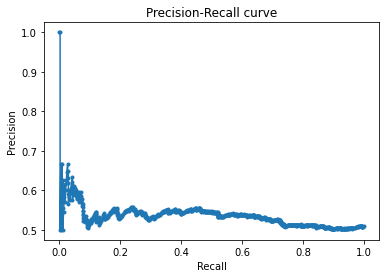

Epoch 7/10, Loss: 0.6924222629313798
Validation Loss: 0.6925599575042725
ROC-AUC: 0.5284925696724763


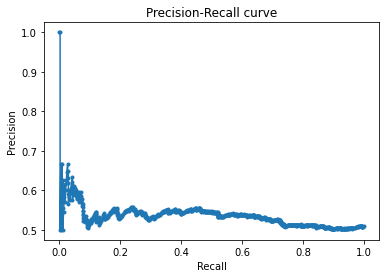

Epoch 8/10, Loss: 0.6924228459525844
Validation Loss: 0.6925599575042725
ROC-AUC: 0.5284925696724763


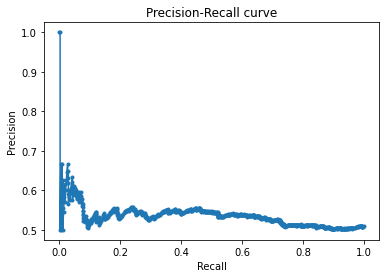

Epoch 9/10, Loss: 0.6924224846719846
Validation Loss: 0.6925599575042725
ROC-AUC: 0.5284925696724763


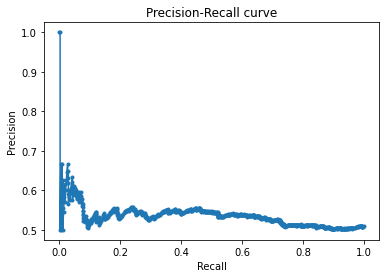

Epoch 10/10, Loss: 0.6924221496683968
Validation Loss: 0.6925599575042725
ROC-AUC: 0.5284925696724763


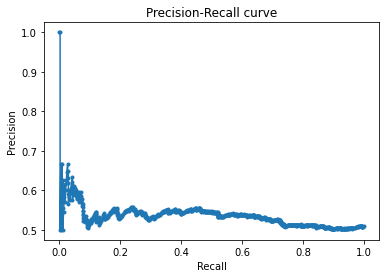


Training with optimizer: Adam
Epoch 1/10, Loss: 0.692604869788163
Validation Loss: 0.6931514143943787
ROC-AUC: 0.4983581712553675


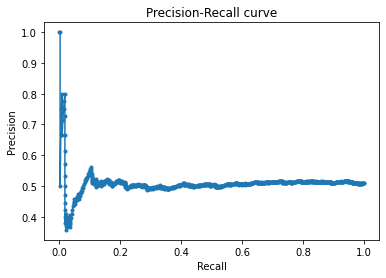

Epoch 2/10, Loss: 0.6926029281774779
Validation Loss: 0.6931514143943787
ROC-AUC: 0.4983581712553675


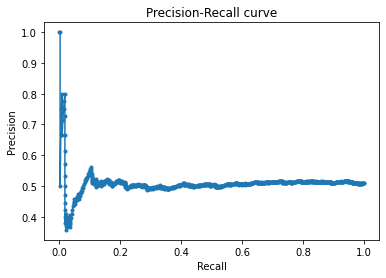

Epoch 3/10, Loss: 0.6926038934612501
Validation Loss: 0.6931514143943787
ROC-AUC: 0.4983581712553675


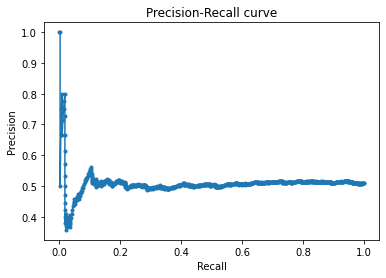

Epoch 4/10, Loss: 0.6926038555181507
Validation Loss: 0.6931514143943787
ROC-AUC: 0.4983581712553675


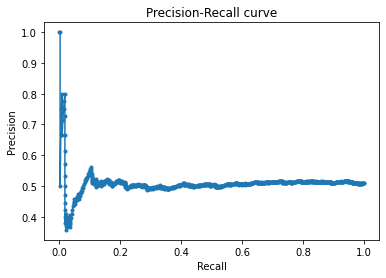

Epoch 5/10, Loss: 0.6926026995561468
Validation Loss: 0.6931514143943787
ROC-AUC: 0.4983581712553675


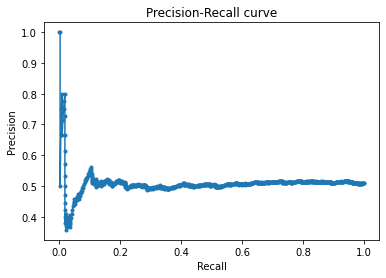

Epoch 6/10, Loss: 0.6926029592115353
Validation Loss: 0.6931514143943787
ROC-AUC: 0.4983581712553675


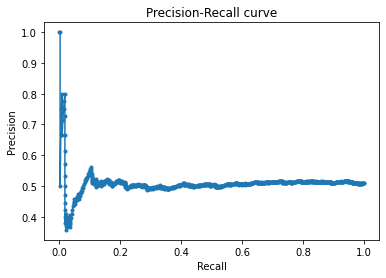

Epoch 7/10, Loss: 0.6926042820948604
Validation Loss: 0.6931514143943787
ROC-AUC: 0.4983581712553675


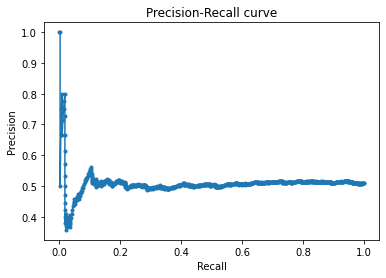

Epoch 8/10, Loss: 0.6926039020975525
Validation Loss: 0.6931514143943787
ROC-AUC: 0.4983581712553675


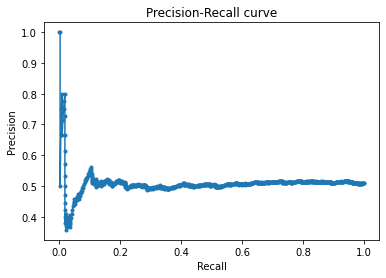

Epoch 9/10, Loss: 0.6926028549246437
Validation Loss: 0.6931514143943787
ROC-AUC: 0.4983581712553675


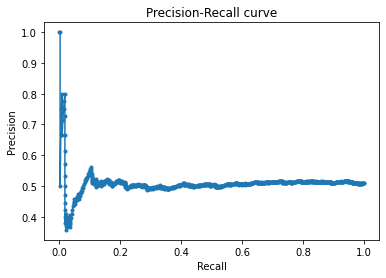

Epoch 10/10, Loss: 0.6926033494025114
Validation Loss: 0.6931514143943787
ROC-AUC: 0.4983581712553675


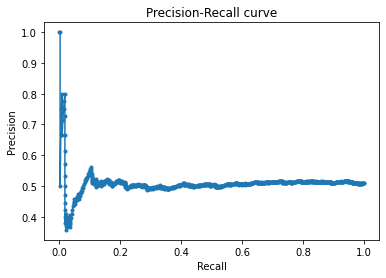

In [25]:
import torch.optim as optim

def tune_optimizer(train_loader, val_loader):
    """
    Experiment with different optimizers for logistic regression.
    
    Parameters
    ----------
    train_loader : DataLoader
        DataLoader for the training set.
    val_loader : DataLoader
        DataLoader for the validation set.
    """
    
    # START YOUR CODE HERE
    # Define parameters (as tensors) to be optimized
    params = [torch.randn(3, requires_grad=True), torch.randn(2, requires_grad=True)]
    optimizers = {
         "SGD": optim.SGD(params, lr=0.001), # Chose optimal learning rate from 4.4.1
         "Adam": optim.Adam(params, lr=0.001),
    #     # Add more optimizers if possible
    }
        
    # END YOUR CODE HERE
    
    for opt_name, optimizer in optimizers.items():
        print(f"\nTraining with optimizer: {opt_name}")
        # START YOUR CODE HERE
        # 1. Initialize the model with the appropriate number of features. model = ...
        model = LogisticRegression(input_features=5000)
        #Define criterion loss function
        criterion = nn.BCEWithLogitsLoss()
        # 2. Train and evaluate the model.
        train_and_evaluate(model, train_loader, val_loader, criterion, optimizer, epochs=10)
        # END YOUR CODE HERE

tune_optimizer(train_loader, val_loader)

I chose to do just SGD and Adam optimizer. I chose to set the learning rate as 0.001, which was the optimal learning rate when we tested them in Problem 4.4.1. However, we have to note that 0.001 may not be the best learning rate for every optimizer. Based on the parameters I set, SGD seemed to perform better.

## Part 5: Multilayer Perceptrons and Backpropagation (60 points)

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import ndarray
from typing import Any

In this part, we provide some random test cases, which cover the gradient computation for the `Sigmoid` and `ReLU` activation functions, the `backward` pass of the `Activation` and `Linear` layers, and the loss and gradient computation for the `MSELoss` and `BinaryCrossEntropyLoss` functions. You can run these test cases to validate your implementation.

### Problem 5.1 (10 points)

Implement the `gradient` of Sigmoid and ReLU activation functions.
The `Activation` class is designed to accomodate various activation functions. Explain its functionality: why the `update` function is empty and why the `backward` function is implemented this way?

In [2]:
class Sigmoid:
    def forward(self, x: ndarray) -> ndarray:
        """
        Compute the forward pass of the Sigmoid activation function.

        Parameters:
            x (ndarray): The input array.

        Returns:
            ndarray: Sigmoid activation applied elementwise to the input array.
        """
        return 1 / (1 + np.exp(-x))

    def gradient(self, x: ndarray) -> ndarray:
        """
        Compute the gradient of the Sigmoid function.

        Parameters:
            x (ndarray): The input array.

        Returns:
            ndarray: The gradient of the Sigmoid function evaluated at each element of the input array.
        """
        # START YOUR CODE HERE
        # Fill in the code below to compute the gradient of the Sigmoid function.
        sigmoid_x = self.forward(x)
        return sigmoid_x * (1 - sigmoid_x)
        # END YOUR CODE HERE


class ReLU:
    def forward(self, x: ndarray) -> ndarray:
        """
        Compute the forward pass of the ReLU activation function.

        Parameters:
            x (ndarray): The input array.

        Returns:
            ndarray: ReLU activation applied elementwise to the input array.
        """
        return np.maximum(0, x)

    def gradient(self, x: ndarray) -> ndarray:
        """
        Compute the gradient of the ReLU function.

        Parameters:
            x (ndarray): The input array.

        Returns:
            ndarray: The gradient of the ReLU function, which is 1 for positive elements and 0 for non-positive elements.
        """
        # START YOUR CODE HERE
        # Fill in the code below to compute the gradient of the ReLU function.
        return np.where(x > 0, 1, 0)
        # END YOUR CODE HERE


class Activation:
    """
    Wrapper layer for activation functions.

    Attributes:
        activation (instance): The activation instance.
        name (str): The name of the activation.
        input (ndarray): The last input passed to the activation function.
        output (ndarray): The last output from the activation function.
    """
    def __init__(self, act, name="activation"):
        self.activation = act
        self.name = name
        self.input = None
        self.output = None

    def forward(self, x: ndarray) -> ndarray:
        """
        Compute the forward pass of the activation function and store input/output for gradient computation.

        Parameters:
            x (ndarray): The input array.

        Returns:
            ndarray: The result of the activation function.
        """
        self.input = x
        self.output = self.activation.forward(x)
        return self.output

    def backward(self, gradient_loss_to_output: ndarray) -> ndarray:
        """
        Compute the backward pass of the activation function.

        Parameters:
            gradient_loss_to_output (ndarray): The gradient of the loss function with respect to the output of this layer.

        Returns:
            ndarray: The gradient of the loss function with respect to the input of this layer.
        """
        return self.activation.gradient(self.input) * gradient_loss_to_output

    def update(self, *args, **kwargs):
        """
        Placeholder for updating parameters, if applicable. For activations, this might be empty.
        """
        pass

    def __call__(self, x: ndarray) -> ndarray:
        """
        Make the class callable, equivalent to calling the forward method.
        """
        return self.forward(x)
    def __repr__(self) -> str:
        return f"Activation ({self.name})"

In [3]:
print('Testing Sigmoid gradient...')
x = np.array([-2, -1, 0, 1, 2]).reshape(-1, 1)
s = Sigmoid()
expected_output = np.array([[0.10499359], [0.19661193], [0.25], [0.19661193], [0.10499359]])
assert np.allclose(s.gradient(x), expected_output), 'Sigmoid gradient test failed'
print('Sigmoid gradient test passed!')

Testing Sigmoid gradient...
Sigmoid gradient test passed!


In [4]:
print('Testing ReLU gradient...')
x = np.array([-2, -1, 1, 2]).reshape(-1, 1)
r = ReLU()
expected_output = np.array([[0], [0], [1], [1]])
assert np.allclose(r.gradient(x), expected_output), 'ReLU gradient test failed'
print('ReLU gradient test passed!')

Testing ReLU gradient...
ReLU gradient test passed!


In [5]:
print('Testing Activation backward...')
x = np.array([-2, -1, 1, 2]).reshape(-1, 1)
a = Activation(ReLU())
out = a(x)
output_error = np.array([0.1, 0.2, 0.4, 0.5]).reshape(-1, 1)
expected_output = np.array([[0.], [0.], [0.4], [0.5]])
assert np.allclose(a.backward(output_error), expected_output), 'Activation backward test failed'
print('Activation backward test passed!')

Testing Activation backward...
Activation backward test passed!


The activation class allows us to apply different activation functions in a neural network model. The update function is intentionally empty because activation functions don't have parameters that need updating, such as weights or biases. Furthermore,, the backward function is implemented using the chain rule to computer gradients for backpropogation.

### Problem 5.2 (10 points)

Implement the `backward` pass (backpropagation) for the linear layer.

In [6]:
class Linear:
    """
    Linear Layer that performs a linear transformation.

    Attributes:
        W (ndarray): Weight matrix of the layer.
        b (ndarray): Bias vector of the layer.
        name (str): Name of the layer.
        input (ndarray): Store the input to the layer to use during backpropagation.
        output (ndarray): Store the output of the layer for further layers' input.
        n_in (int): Number of input features.
        n_out (int): Number of output features.
        gradient_w (ndarray): Gradient of the layer's weights.
        gradient_b (ndarray): Gradient of the layer's biases.
    """
    def __init__(self, n_in: int, n_out: int, name: str="layer"):
        limit = 1 / np.sqrt(n_in)
        self.W = np.random.uniform(-limit, limit, (n_in, n_out))
        self.b = np.random.rand(n_out)  # Biases
        self.name = name
        
        self.n_in = n_in
        self.n_out = n_out
        
        self.input: ndarray = None
        self.output: ndarray = None

        self.gradient_w: ndarray = None
        self.gradient_b: ndarray = None

    def forward(self, x: ndarray) -> ndarray:
        """
        Compute the forward pass through the linear layer.

        Parameters:
            x (ndarray): Input data.

        Returns:
            ndarray: Output of the linear transformation.
        """
        self.input = x
        self.output = np.dot(self.input, self.W) + self.b
        return self.output

    def __call__(self, x):
        return self.forward(x)

    def backward(self, gradient_loss_to_output: ndarray) -> ndarray:
        """
        Backward pass through the linear layer to compute the gradient.

        Parameters:
            gradient_loss_to_output (ndarray): Gradient of the loss with respect to the output of this layer.

        Returns:
            ndarray: Gradient of the loss with respect to the input of this layer and backpropagate to the previous layer.
        """
        # START YOUR CODE HERE
        """
            Fill in the code below to compute the gradient of the loss with respect to the input of the Linear layer.
            Compute the gradients of the loss with respect to the weights (self.gradient_w) and biases (self.gradient_b) of the Linear layer.
            
            Use the stored self.input and self.output.
            
        """
        self.gradient_w = np.dot(self.input.T, gradient_loss_to_output)
        self.gradient_b = np.sum(gradient_loss_to_output, axis=0)
        gradient_loss_to_input = np.dot(gradient_loss_to_output, self.W.T)
        return gradient_loss_to_input
        
        # END YOUR CODE HERE

    def update(self, lr=0.01, *args):
        """
        Update the weights and biases using the computed gradients.

        Parameters:
            lr (float): Learning rate.
        """
        if self.gradient_w is not None:
            self.W -= lr * self.gradient_w
        if self.gradient_b is not None:
            self.b -= lr * self.gradient_b

    def __repr__(self) -> str:
        return f"({self.name}): Linear({self.n_in} -> {self.n_out})"

In [7]:
x = np.array([[1, 2], [3, 4], [5, 6]])
print(x.shape)
l = Linear(2, 4)
l.W = np.array([[0.1, 0.2, 0.3, 0.4], [0.4, 0.5, 0.6, 0.7]])  # Fixed weights
l.b = np.array([0.7, 0.8, 0.9, 1.0])  # Fixed biases
out = l(x)
next_layer_grad = np.array([[0, 0.1, 0.2, 0.3], [0, 0.4, 0.5, 0.6], [0, 0.7, 0.8, 0.9]])
prev_layer_grad = l.backward(gradient_loss_to_output = next_layer_grad)
assert l.gradient_w.shape == (2, 4), 'Linear backward test failed'
assert l.gradient_b.shape == (4,), 'Linear backward test failed'
expected_grad_w = np.array([[0. , 4.8, 5.7, 6.6],
                            [0. , 6. , 7.2, 8.4]])
expected_grad_b = np.array([0. , 1.2, 1.5, 1.8])
expected_prev_layer_grad = np.array([[0.2 , 0.38],
                                     [0.47, 0.92],
                                     [0.74, 1.46]])
assert np.allclose(l.gradient_w, expected_grad_w), 'Linear backward test failed for w'
assert np.allclose(l.gradient_b, expected_grad_b), 'Linear backward test failed for b'
assert np.allclose(prev_layer_grad, expected_prev_layer_grad), 'Linear backward test failed for backpropagate'
print('Linear backward test passed!')

(3, 2)
Linear backward test passed!


In [8]:
class Network:
    """
    Represents a simple neural network, which can consist of various types of layers.
    
    Attributes:
        layers (List): A list of layers in the network.
    """
    def __init__(self, layers: list[Any]):
        """
        Initializes the neural network with a given list of layers.

        Parameters:
            layers (List): A list of layers that make up the network.
        """
        self.layers = layers

    def forward(self, x: ndarray, last_layer: bool = False) -> ndarray:
        """
        Perform a forward pass through the network.

        Parameters:
            x (ndarray): The input data.
            last_layer (bool): If True, stops the forward pass before the last layer.

        Returns:
            ndarray: The output of the network after the forward pass.
        """
        n_layer = len(self.layers)
        for i, layer in enumerate(self.layers):
            if last_layer and i == n_layer - 2:
                break
            x = layer(x)
        return x

    def backward(self, loss_grad: ndarray):
        """
        Perform a backward pass through the network, propagating the gradient of the loss.

        Parameters:
            gradient_loss_to_output (ndarray): Gradient of the loss function with respect to the output of the network.
        """
        prev_layer_grad = loss_grad
        for layer in reversed(self.layers):
            prev_layer_grad = layer.backward(gradient_loss_to_output = prev_layer_grad)

    def update(self, lr: float, **kwargs):
        """
        Update the parameters of the network's layers based on the gradients computed during the backward pass.

        Parameters:
            lr (float): Learning rate for the update step.
        """
        for layer in self.layers:
            layer.update(lr, **kwargs)

    def __call__(self, x: ndarray) -> ndarray:
        """
        Make the network callable, allowing direct passing of input data for a forward pass.

        Parameters:
            x (ndarray): The input data to process.

        Returns:
            ndarray: The output of the network.
        """
        return self.forward(x)

    def __repr__(self) -> str:
        """
        Provide a string representation of the network, showing the sequence of layers.

        Returns:
            str: A string description of the network and its layers.
        """
        return ' -> '.join(repr(layer) for layer in self.layers)

### Problem 5.3 (10 points)

Given:

- Input matrix $\boldsymbol{X} \in \mathbb{R}^{n \times m}$
- Weight matrix $\boldsymbol{W} \in \mathbb{R}^{m \times k}$
- Bias vector $\boldsymbol{b} \in \mathbb{R}^{k}$
- Pre-softmax activations $\boldsymbol{A} = \boldsymbol{X}\boldsymbol{W} + \boldsymbol{b} \in \mathbb{R}^{n \times k}$
- Softmax output $\hat{\boldsymbol{y}} = \text{softmax}(\boldsymbol{A}) \in \mathbb{R}^{n \times k}$
- One-hot encoded true labels $\boldsymbol{y} \in \{0,1\}^{n \times k}$
- Loss $l = -\sum_{i=1}^n \sum_{j=1}^k y_{ij} \log(\hat{y}_{ij})$

Please follow the chain rule to calculate $\frac{\partial l}{\partial \boldsymbol{W}}$.


To calculate $\frac{\partial l}{\partial \boldsymbol{W}}$, we have to realize that

$$
\frac{\partial l}{\partial \boldsymbol{W}} = \frac{\partial l}{\partial \hat{\boldsymbol{y}}} * \frac{\partial \hat{\boldsymbol{y}}}{\partial \boldsymbol{A}} * \frac{\partial \boldsymbol{A}}{\partial \boldsymbol{W}}
$$

First, we have to calculate $\frac{\partial l}{\partial \hat{\boldsymbol{y}}}$, the gradient of the loss:

The partial derivative of the loss $l$ with respect to $\hat{y}_{ij}$ is:
$$
\frac{\partial l}{\partial \hat{y}_{ij}} = - \frac{y_{ij}}{\hat{y}_{ij}}
$$

Next, we calculate $\frac{\partial \hat{\boldsymbol{y}}}{\partial \boldsymbol{A}}$, the gradient of the softmax:

The derivative of $\hat{y}_{ij}$ with respect to $A_{im}$ can be written as:

$$
\frac{\partial \hat{y}_{ij}}{\partial A_{im}} =
\begin{cases} 
\hat{y}_{ij} (1 - \hat{y}_{ij}) & \text{if } j = m \\
-\hat{y}_{ij} \hat{y}_{im} & \text{if } j \neq m
\end{cases}
$$

However, for backpropagation through the softmax combined with cross-entropy loss, we can simplify the gradient:
$$
\frac{\partial l}{\partial A} = \hat{y} - y
$$

Finally, we calculate $\frac{\partial \boldsymbol{A}}{\partial \boldsymbol{W}}$, the gradient of the pre-softmax activation:

The derivative of $ A $ with respect to $ W $ is:
$$
\frac{\partial A}{\partial W} = X^T
$$


Using the chain rule, the gradient of the loss with respect to \( W \) is:

$$
\frac{\partial l}{\partial \boldsymbol{W}} = \frac{\partial l}{\partial \hat{\boldsymbol{y}}} * \frac{\partial \hat{\boldsymbol{y}}}{\partial \boldsymbol{A}} * \frac{\partial \boldsymbol{A}}{\partial \boldsymbol{W}}
$$

or

$$
\frac{\partial l}{\partial W} = \frac{\partial l}{\partial A} \cdot \frac{\partial A}{\partial W}
$$

Thus:

$$
\frac{\partial l}{\partial W} = X^T (\hat{y} - y)
$$




In [9]:
# An example pytorch ground-truth (for your sanity check) is:

import torch
import torch.nn.functional as F

# Example setup with more descriptive variable names
num_samples = 3  # The number of samples in our batch
input_features = 5  # Number of input features
num_classes = 3  # Number of classes for classification

# Input data, no gradient needed for X
X = torch.randn(num_samples, input_features, requires_grad=False)

# Weights for our network, we want gradients for learning
W = torch.randn(input_features, num_classes, requires_grad=True)

# Bias vector for the output layer
b = torch.randn(1, num_classes, requires_grad=True)

# One-hot encoded labels for multi-class problem
# Here we use torch's eye to create identity matrix for one-hot encoding
y = torch.eye(num_classes)[torch.randint(0, num_classes, (num_samples,))].float()

# Forward pass
A = X @ W + b  # Linear transformation, A is the pre-softmax logits
y_hat = F.softmax(A, dim=1)  # Softmax to convert logits to probabilities

# Loss calculation - Using cross entropy loss which combines log softmax and NLL loss
loss = F.cross_entropy(A, y.argmax(dim=1))  # argmax to get class index from one-hot encoding

# Backward pass to compute gradients
loss.backward()

# Print gradients
print("Gradient of W:\n", W.grad)
print("Gradient of b:\n", b.grad)

Gradient of W:
 tensor([[ 0.1738, -0.1302, -0.0435],
        [ 0.4111, -0.1815, -0.2295],
        [ 0.6625, -0.5276, -0.1349],
        [-0.6171,  0.5701,  0.0470],
        [-0.0421,  0.2596, -0.2176]])
Gradient of b:
 tensor([[ 0.0442,  0.5529, -0.5971]])


### Problem 5.4 (10 points)

Implement the binary cross entropy loss function.
Fill in the code for the `loss` and `gradient` methods.
An example of MSE loss function has been provided.
Please pay attention to the edge cases when $p = 0$ or $p = 1$.
You might find the [documentation](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) for PyTorch's implementation helpful.

In [37]:
class MSELoss:
    def loss(self, y_true: ndarray, y_pred: ndarray) -> float:
        """
        Compute the mean squared error loss.

        Parameters:
            y_true (ndarray): Actual values.
            y_pred (ndarray): Predicted values.

        Returns:
            float: The mean squared error loss.
        """
        return np.mean(np.power(y_true - y_pred, 2))

    def gradient(self, y_true: ndarray, y_pred: ndarray) -> ndarray:
        """
        Compute the gradient of the mean squared error loss.

        Parameters:
            y_true (ndarray): Actual values.
            y_pred (ndarray): Predicted values.

        Returns:
            ndarray: The gradient of the loss.
        """
        return 2 * (y_pred - y_true) / y_true.size


class BinaryCrossEntropyLoss:
    def loss(self, y: ndarray, p: ndarray) -> float:
        """
        Compute the mean of binary cross-entropy loss between the true labels and predicted probabilities of positive class.
        
        Parameters:
            y (ndarray): The true labels (numpy array of shape (n_samples,)).
            p (ndarray): The predicted probabilities (numpy array of shape (n_samples,)).
        
        Returns:
            float: The the mean of binary cross-entropy loss value.
        """
        # START YOUR CODE HERE
        # Fill in the code below to compute the loss of the BinaryCrossEntropy.
        # Remember to deal with case when p is close to 0.
        # Clipping predicted probabilities to avoid log(0)
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
        # END YOUR CODE HERE

    def gradient(self, y: ndarray, p: ndarray) -> ndarray:
        """
        Compute the gradient of the binary cross-entropy loss with respect to the predicted probabilities of positive class.
        Remember to deal with case when p is close to 0.
        
        Parameters:
            y (ndarray): The true labels (numpy array of shape (n_samples,)).
            p (ndarray): The predicted probabilities (numpy array of shape (n_samples,)).
        
        Returns:
            ndarray: The gradient of the binary cross-entropy loss with respect to the predicted probabilities.
        """
        # START YOUR CODE HERE
        # Fill in the code below to compute the gradient of BCELoss to prediction p.
        # Remember to deal with case when p is close to 0. 
        # Clipping predicted probabilities to avoid division by zero
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return (p - y) / (p * (1 - p))
        # END YOUR CODE HERE

In [38]:
print('Testing BinaryCrossEntropyLoss...')
y_true = np.array([1,   0,   1,   0,   1]).reshape(-1, 1)
y_pred = np.array([0.9, 0.2, 0.8, 0.3, 0.7]).reshape(-1, 1)
bce = BinaryCrossEntropyLoss()
expected_loss = 0.2529995
expected_gradient = np.array([[-1.11111111], [1.25], [-1.25], [1.42857143], [-1.42857143]])
assert np.allclose(bce.loss(y_true, y_pred), expected_loss), 'BinaryCrossEntropyLoss loss test failed'
assert np.allclose(bce.gradient(y_true, y_pred), expected_gradient), 'BinaryCrossEntropyLoss gradient test failed'


zero_loss = bce.loss(y = np.array([1]), p = np.array([0]))
assert zero_loss > 10

zero_gradient = bce.gradient(y = np.array([1,0]), p = np.array([0, 0]))
assert zero_gradient[0] < -1e3
assert zero_gradient[1] > 1
print(zero_loss)

print('BinaryCrossEntropyLoss test passed!')

Testing BinaryCrossEntropyLoss...
34.538776394910684
BinaryCrossEntropyLoss test passed!


The following cells generate a toy dataset of two circles. You should be able to see similar plots of decision boundaries.

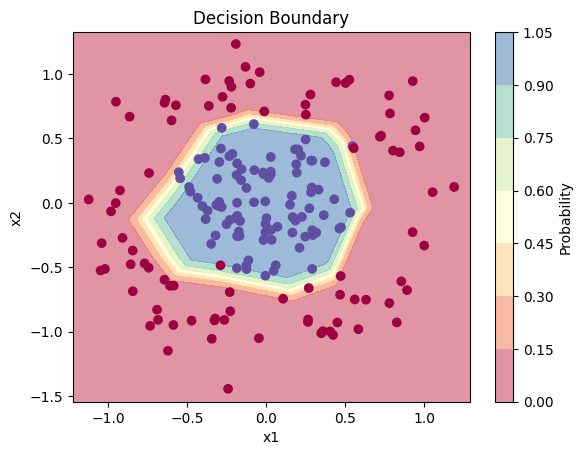

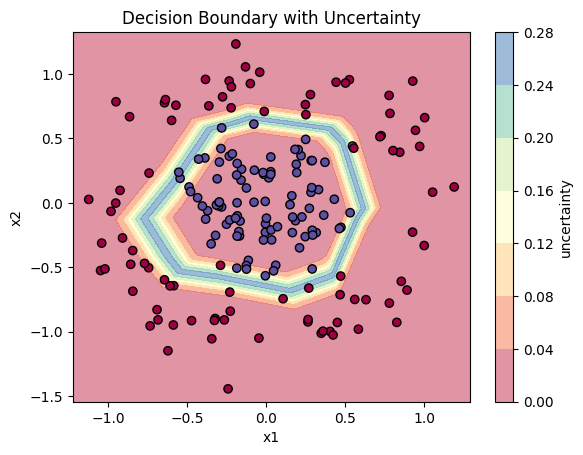

In [26]:
model = Network(layers =
    [
        Linear(2, 10, name="input"),
        Activation(ReLU(), name="relu1"),
        Linear(10, 10, name="middle"),
        Activation(ReLU(), name="relu2"),
        Linear(10, 1, name="output"),
        Activation(Sigmoid(), name="sigmoid")
    ]
)

In [27]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

EPOCHS = 1000

model = Network(layers =
    [
        Linear(2, 10, name="input"),
        Activation(ReLU(), name="relu1"),
        Linear(10, 10, name="middle"),
        Activation(ReLU(), name="relu2"),
        Linear(10, 1, name="output"),
        Activation(Sigmoid(), name="sigmoid")
    ]
)

print(model)

def load_data():
    X, Y = make_circles(noise=0.15, factor=0.3, random_state=1, n_samples=500)
    Y = Y.reshape(-1, 1)
    Y = Y.reshape((Y.shape[0], 1))
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.36, random_state=42)
    return X_train, X_test, y_train, y_test


criterion = BinaryCrossEntropyLoss()
X_train, X_test, y_train, y_test = load_data()
for epoch in range(1, EPOCHS + 1):
    out = model(X_train)
    loss_gradient = criterion.gradient(y_train, out)
    model.backward(loss_gradient)
    model.update(lr=0.001)
    if epoch % 10 == 0:
        loss = criterion.loss(y_train, out)
        acc = (np.where(out > 0.5, 1, 0) == y_train).mean()
        print(f"Epoch: {epoch}, Loss:{loss}, Acc: {acc}")

(input): Linear(2 -> 10) -> Activation (relu1) -> (middle): Linear(10 -> 10) -> Activation (relu2) -> (output): Linear(10 -> 1) -> Activation (sigmoid)
Epoch: 10, Loss:[0.67211532], Acc: 0.79375
Epoch: 20, Loss:[0.659416], Acc: 0.759375
Epoch: 30, Loss:[0.64107745], Acc: 0.775
Epoch: 40, Loss:[0.61436763], Acc: 0.803125
Epoch: 50, Loss:[0.57722711], Acc: 0.821875
Epoch: 60, Loss:[0.52844972], Acc: 0.86875
Epoch: 70, Loss:[0.46874097], Acc: 0.903125
Epoch: 80, Loss:[0.40248539], Acc: 0.91875
Epoch: 90, Loss:[0.33276722], Acc: 0.934375
Epoch: 100, Loss:[0.26166862], Acc: 0.95625
Epoch: 110, Loss:[0.19731181], Acc: 0.965625
Epoch: 120, Loss:[0.14739048], Acc: 0.984375
Epoch: 130, Loss:[0.11476017], Acc: 0.9875
Epoch: 140, Loss:[0.09451696], Acc: 0.990625
Epoch: 150, Loss:[0.08128776], Acc: 0.990625
Epoch: 160, Loss:[0.07211947], Acc: 0.990625
Epoch: 170, Loss:[0.06546695], Acc: 0.990625
Epoch: 180, Loss:[0.06045024], Acc: 0.990625
Epoch: 190, Loss:[0.05653193], Acc: 0.990625
Epoch: 200, L

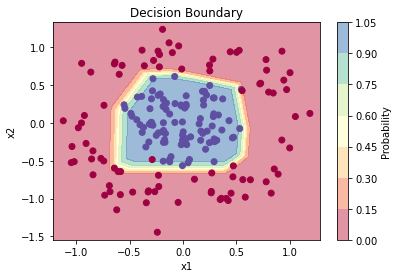

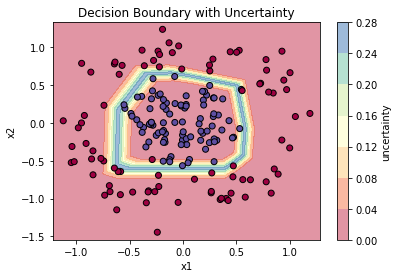

In [28]:
def plot_decision_boundary_and_uncertainty(model, X, Y):
    # Set min and max values and give it some padding
    x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    h = 0.01
    # Generate a grid of points with distance h between them
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    # Predict the function value for the whole gid
    Z = model.forward(np.c_[x1.ravel(), x2.ravel()])
    Z = Z.reshape(x1.shape)
    # Plot the contour and training examples
    plt.contourf(x1, x2, Z, alpha=0.5, cmap=plt.cm.Spectral)
    plt.colorbar(label='Probability')
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1], c=Y.reshape(-1), cmap=plt.cm.Spectral)
    plt.title("Decision Boundary")
    plt.show()

    uncertainty = Z * (1 - Z)
    uncertainty = uncertainty.reshape(x1.shape)
    # Plot the contour and training examples
    plt.contourf(x1, x2, uncertainty, alpha=0.5, cmap=plt.cm.Spectral)
    plt.colorbar(label='uncertainty')
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1], c=Y.reshape(-1), cmap=plt.cm.Spectral, edgecolors='k')

    plt.title("Decision Boundary with Uncertainty")
    plt.show()

plot_decision_boundary_and_uncertainty(model, X_test, y_test)

### Problem 5.5 (10 points)

Run the provided code to visualize the output of the last layer, gradients, and weights.
Observe and analyze the visualizations.

You should see the decision boundary for each feature in the last layer.
The gradients and weights also provide insights into the learning process of the network.

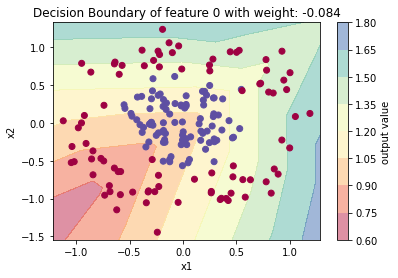

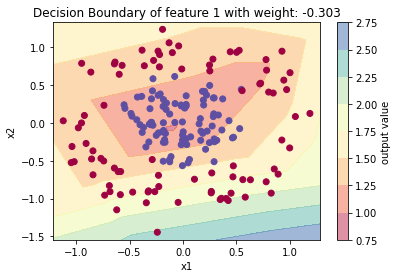

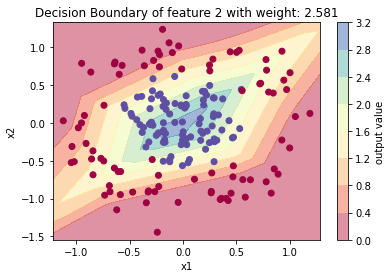

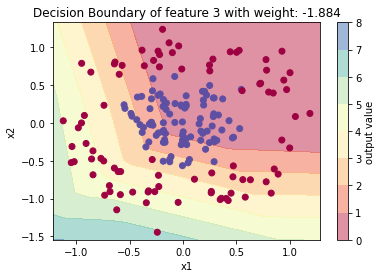

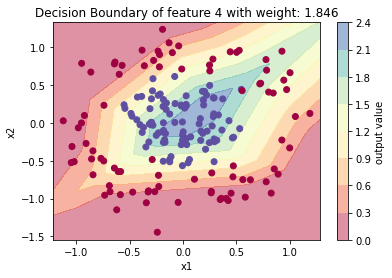

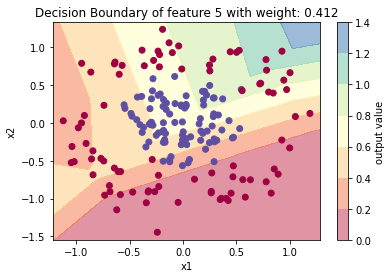

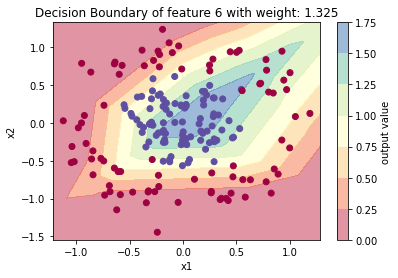

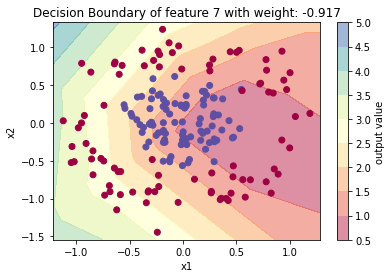

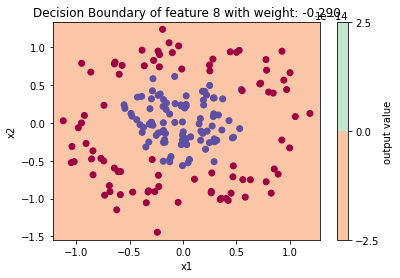

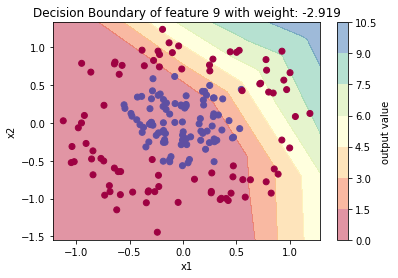

In [29]:
def plot_decision_boundary_per_feature_last_layer(model, X, Y):
    # Set min and max values and give it some padding
    x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    h = 0.01
    # Generate a grid of points with distance h between them
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    # Predict the function value for the whole gid
    Z = model.forward(np.c_[x1.ravel(), x2.ravel()], last_layer=True)
    Z = Z.reshape([x1.shape[0], x1.shape[1], -1])
    last_layer_weight = model.layers[-2].W.reshape(-1)
    for feature_idx, feature_w in enumerate(last_layer_weight):
        feature = Z[:, :, feature_idx]
        plt.contourf(x1, x2, feature, alpha=0.5, cmap=plt.cm.Spectral)
        plt.colorbar(label='output value')
        plt.ylabel('x2')
        plt.xlabel('x1')
        plt.scatter(X[:, 0], X[:, 1], c=Y.reshape(-1), cmap=plt.cm.Spectral)
        plt.title("Decision Boundary of feature %d with weight: %.3f" % (feature_idx, feature_w))
        plt.show()

plot_decision_boundary_per_feature_last_layer(model, X_test, y_test)

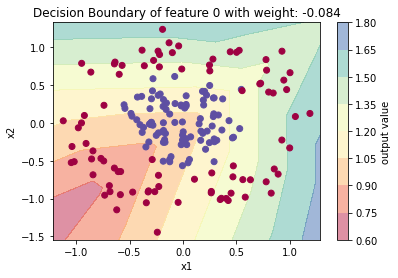

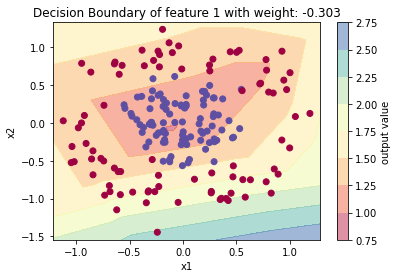

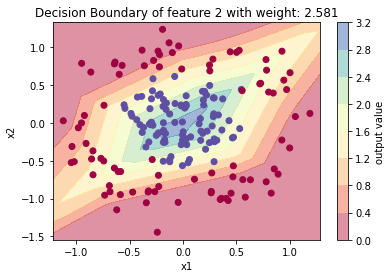

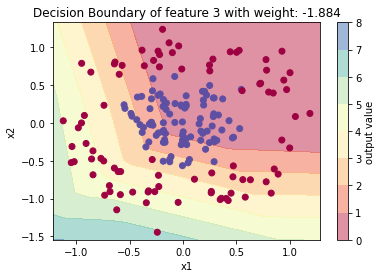

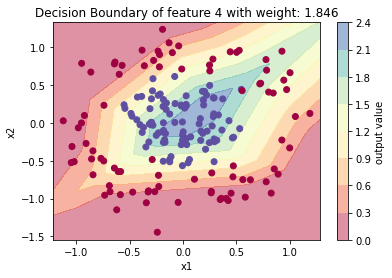

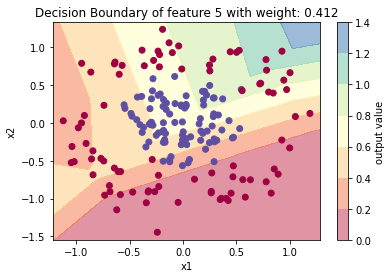

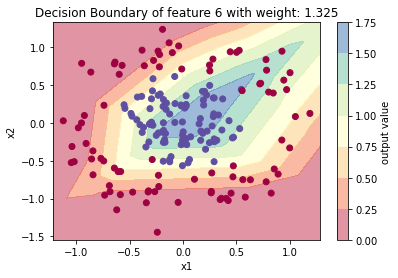

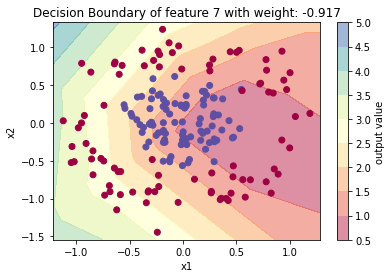

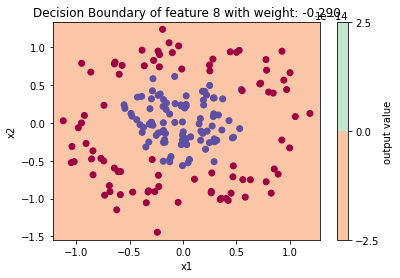

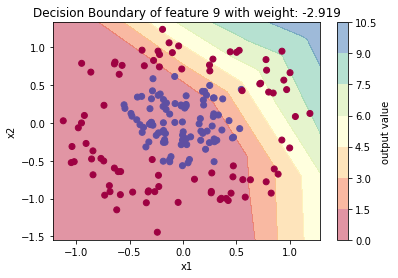

In [30]:
X, Y = X_test, y_test

# Set min and max values and give it some padding
x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
h = 0.01
# Generate a grid of points with distance h between them
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
# Predict the function value for the whole gid
Z = model.forward(np.c_[x1.ravel(), x2.ravel()], last_layer=True)
Z = Z.reshape([x1.shape[0], x1.shape[1], -1])
last_layer_weight = model.layers[-2].W.reshape(-1)
for feature_idx, feature_w in enumerate(last_layer_weight):
    feature = Z[:, :, feature_idx]
    plt.contourf(x1, x2, feature, alpha=0.5, cmap=plt.cm.Spectral)
    plt.colorbar(label='output value')
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1], c=Y.reshape(-1), cmap=plt.cm.Spectral)
    plt.title("Decision Boundary of feature %d with weight: %.3f" % (feature_idx, feature_w))
    plt.show()

In [31]:
import matplotlib.colors as mcolors


def visualize_layer(layer, visualize_gradient = True):
    if not hasattr(layer, "gradient_w"):
        return
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    # Assuming layer.grad_W and layer.grad_b exist

    if visualize_gradient:
        _W = layer.gradient_w
        _b = layer.gradient_b
        sns.heatmap(_W, ax=axs[0], center=0, cmap='coolwarm')
    else:
        _W = layer.W
        _b = layer.b
        colors = ['yellow', "red", "black", "orange", 'yellow']  # Red to White to Blue
        cm = mcolors.LinearSegmentedColormap.from_list("custom1", colors, N=100)
        sns.heatmap(_W, ax=axs[0], center=0, cmap=cm,  vmin=-1, vmax=1)
    print(_W.shape, _b.shape)
    # Visualize gradients of weights

    if visualize_gradient:
        axs[0].set_title('Gradient of Weights')
    else:
        axs[0].set_title('Weights')

    # Visualize gradients of biases
    # Note: grad_b is 2D (1 x output_dim), so we flatten it for easier visualization
    axs[1].plot(_b.flatten(), marker='o')
    if visualize_gradient:
        axs[1].set_title('Gradient of Biases')
    else:
        axs[1].set_title('Biases')
    axs[1].set_xlabel('Bias Index')
    axs[1].set_ylabel('Value')

    plt.show()

(2, 10) (10,)


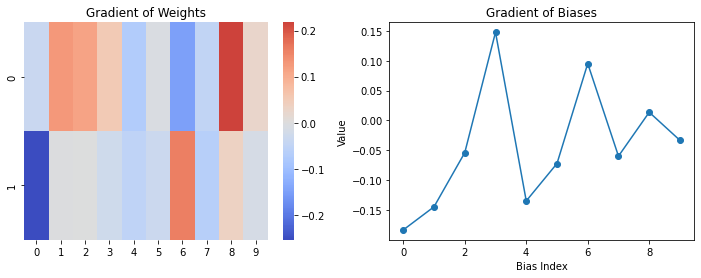

(10, 10) (10,)


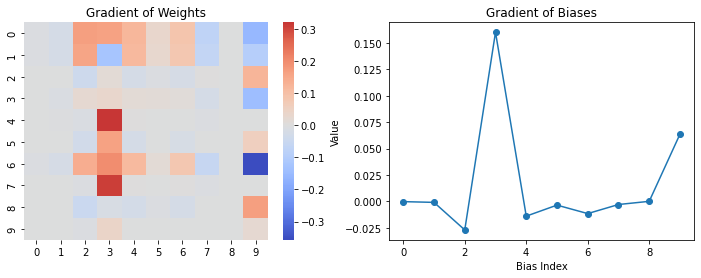

(10, 1) (1,)


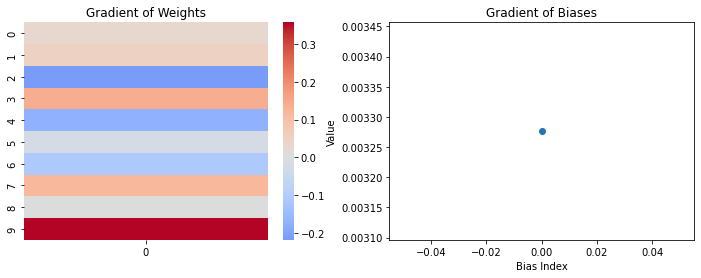

In [32]:
for layer in model.layers:
    visualize_layer(layer)

(2, 10) (10,)


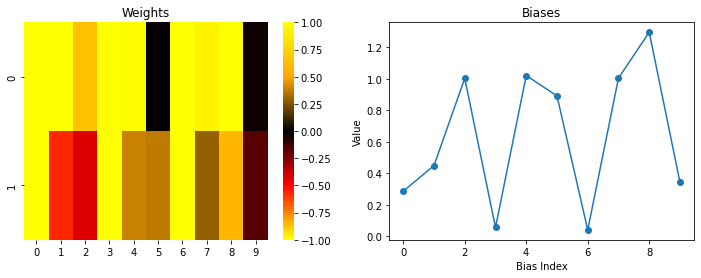

(10, 10) (10,)


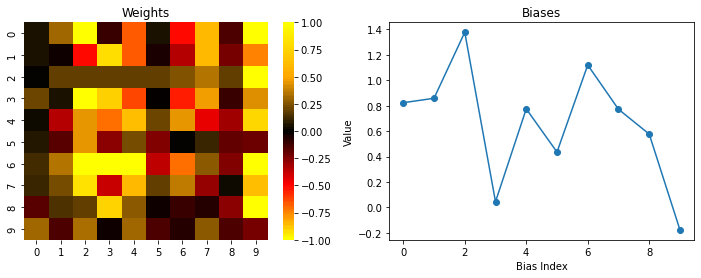

(10, 1) (1,)


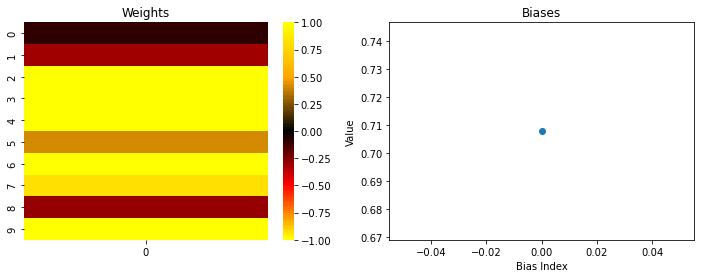

In [33]:
for layer in model.layers:
    visualize_layer(layer, visualize_gradient=False)

From the first plots of the decision boundaries with features and weights, we can see that features 2 and 4 from the last hidden layer have the most significant influence on the final output of the neural network, as they are associated with the largest weights. From the next visualizations, we can see that in the input layer, the weight connecting the 8th input feature to the first neuron in the layer is very red, suggesting that this feature strongly influences the neuron's activation. There is also a large spike at bias index 3 in the input layer's line plot. In the middle layer's plots, we see evidence that the weights connecting feature 3 to the neurons at indices 4 and 7 are strongly positive, reiterating that feature 3 will have a substantial positive effect on the output. Finally, in the output layer, the strong red color at index 9 indicates that the weight connecting the last hidden layer to the output neuron at index 9 is highly positive.

### Problem 5.6 (10 points)

Modify the network architecture to remove all intermediate ReLU activations.
Retrain this network without the ReLU activations and visualize the decision boundary and uncertainty of the retrained network.
Observe how the lack of ReLU activations affects the network's ability to learn non-linear patterns.

In [34]:
model_no_relu = Network(layers=[
    Linear(2, 10, name="input"),
    Linear(10, 10, name="middle"),
    Linear(10, 1, name="output"),
    Activation(Sigmoid(), name="sigmoid")  # Keep the sigmoid activation only in the output layer
])

In [35]:
EPOCHS = 1000  # You can adjust the number of epochs if necessary

X_train, X_test, y_train, y_test = load_data()  # Load your data as before

# Training loop
for epoch in range(1, EPOCHS + 1):
    out = model_no_relu(X_train)  # Forward pass
    loss_gradient = criterion.gradient(y_train, out)  # Calculate gradient
    model_no_relu.backward(loss_gradient)  # Backward pass
    model_no_relu.update(lr=0.001)  # Update weights
    if epoch % 10 == 0:
        loss = criterion.loss(y_train, out)  # Compute loss
        acc = (np.where(out > 0.5, 1, 0) == y_train).mean()  # Calculate accuracy
        print(f"Epoch: {epoch}, Loss: {loss}, Acc: {acc}")

Epoch: 10, Loss: [0.69414855], Acc: 0.34375
Epoch: 20, Loss: [0.69338842], Acc: 0.33125
Epoch: 30, Loss: [0.69294382], Acc: 0.340625
Epoch: 40, Loss: [0.69266836], Acc: 0.35
Epoch: 50, Loss: [0.69249003], Acc: 0.3875
Epoch: 60, Loss: [0.6923706], Acc: 0.390625
Epoch: 70, Loss: [0.69228847], Acc: 0.403125
Epoch: 80, Loss: [0.69223085], Acc: 0.415625
Epoch: 90, Loss: [0.69218981], Acc: 0.428125
Epoch: 100, Loss: [0.69216026], Acc: 0.425
Epoch: 110, Loss: [0.6921388], Acc: 0.43125
Epoch: 120, Loss: [0.69212314], Acc: 0.4375
Epoch: 130, Loss: [0.69211165], Acc: 0.4375
Epoch: 140, Loss: [0.6921032], Acc: 0.446875
Epoch: 150, Loss: [0.69209698], Acc: 0.446875
Epoch: 160, Loss: [0.69209239], Acc: 0.446875
Epoch: 170, Loss: [0.69208899], Acc: 0.453125
Epoch: 180, Loss: [0.69208649], Acc: 0.453125
Epoch: 190, Loss: [0.69208463], Acc: 0.453125
Epoch: 200, Loss: [0.69208326], Acc: 0.453125
Epoch: 210, Loss: [0.69208225], Acc: 0.453125
Epoch: 220, Loss: [0.6920815], Acc: 0.453125
Epoch: 230, Loss:

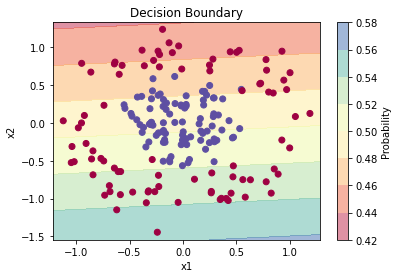

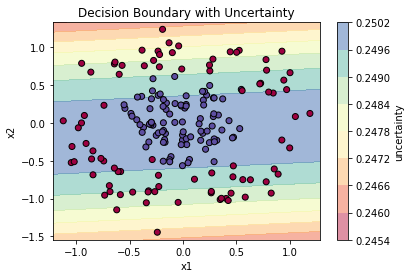

In [36]:
plot_decision_boundary_and_uncertainty(model_no_relu, X_test, y_test)

Overall, removing the ReLU activations essentially reduces the network's capacity to learn non-linear mappings. We can see that in the classifications in the 'Decision Boundary' plot where the model classified strips of classes rather than the ciricular classes we saw before. Furthermore, based on the uncertainty plots, the model is a lot less confident in its predcitions versus when we were using ReLU.